## Connect with Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

#Hospital_Data_Cleaning

## Diagnosis Dataset

### Laod Diagnoisi Data

In [3]:
CDAG =pd.read_excel('/content/drive/MyDrive/Data-science-project/data/general datat for patients.xlsx')

In [4]:
CDAG.head()

,#,Encounter ID,Patient ID,Gender,Age,Encounter Type,Current_Department_Name,Diagnosis,First Physician Note,Amission Date,Discharge Date
0,1,219931.0,89417.0,Male,12.0,Inpatient,Pediatric Department,"Valgus deformity, not elsewhere classified, ri...",the above mentioned patient 10 years old admit...,2021-01-01 07:27:36.667,2021-01-01 17:28:51.593
1,1,219932.0,89418.0,Female,14.0,Inpatient,Pediatric Department,"Flat foot [pes planus] (acquired), unspecified...",the above mentioned patient admitted to our ho...,2021-01-01 07:46:50.237,2021-01-02 10:32:59.510
2,1,219933.0,89419.0,Male,11.0,Inpatient,Pediatric Department,"Flat foot [pes planus] (acquired), unspecified...",the above mentioned patient 9 years old admitt...,2021-01-01 08:23:27.047,2021-01-01 15:49:25.233
3,1,219936.0,89420.0,Male,57.0,Inpatient,Medical Surgical Department,Shortness of breath,"presented complaining of SOB, with mild cough ...",2021-01-01 09:53:18.330,2021-01-02 13:29:59.517
4,1,219938.0,89421.0,Male,65.0,Inpatient,Cardiac Care Unit CCU Department,Non-ST elevation (NSTEMI) myocardial infarction,"A 63 YEARS OLD PATIENT , SMKER , PRESENTID TO ...",2021-01-01 10:56:19.293,2021-01-03 13:43:11.967


In [5]:
CDAG.drop(columns=['#'], inplace=True)

### Checking for missing values

In [6]:
#missing values 
CDAG.isnull().sum()

Encounter ID                1
Patient ID                  1
Gender                      1
Age                         1
Encounter Type              1
Current_Department_Name     1
Diagnosis                   3
First Physician Note       95
Amission Date               1
Discharge Date              8
dtype: int64

In [7]:
CDAG.dropna(subset=['Encounter ID'], inplace=True)

### Checking for Data Type

In [8]:
CDAG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15882 entries, 0 to 15881
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Encounter ID             15882 non-null  float64       
 1   Patient ID               15882 non-null  float64       
 2   Gender                   15882 non-null  object        
 3   Age                      15882 non-null  float64       
 4   Encounter Type           15882 non-null  object        
 5   Current_Department_Name  15882 non-null  object        
 6   Diagnosis                15880 non-null  object        
 7   First Physician Note     15788 non-null  object        
 8   Amission Date            15882 non-null  datetime64[ns]
 9   Discharge Date           15875 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 1.3+ MB


In [9]:
CDAG = CDAG.astype({"Encounter ID":"int","Patient ID":"int","Age":"int"})

### Gender Check

In [10]:
CDAG['Gender'].unique()

array(['Male', 'Female', 'description'], dtype=object)

In [11]:
CDAG.loc[CDAG['Gender'] =='description']

,Encounter ID,Patient ID,Gender,Age,Encounter Type,Current_Department_Name,Diagnosis,First Physician Note,Amission Date,Discharge Date
13001,283105,107137,description,58,Inpatient,Chemotherapy Day Care Department,Personal history of malignant neoplasm of liver,57 years old male.\nM+8\nFH negative\nHTN\nHBV...,2021-10-30 10:11:12.623,2021-10-30 19:38:33.667
13981,287923,107137,description,58,Inpatient,Chemotherapy Day Care Department,Personal history of malignant neoplasm of liver,57 years old male.\nM+8\nFH negative\nHTN\nHBV...,2021-11-20 09:16:35.027,2021-11-20 16:04:59.060
14928,292945,107137,description,58,Inpatient,Chemotherapy Day Care Department,Personal history of malignant neoplasm of liver,57 years old male.\nM+8.\nFH negative.\nHTN.\n...,2021-12-11 09:59:46.000,2021-12-11 06:42:15.000


In [12]:
CDAG.drop(CDAG.index[CDAG['Gender'] == 'description'], inplace=True)

### differentes date

In [13]:
CDAG['days']=CDAG['Discharge Date']-CDAG['Amission Date']
CDAG['days']=CDAG['days']/np.timedelta64(1,'D')

In [14]:
CDAG.head()

,Encounter ID,Patient ID,Gender,Age,Encounter Type,Current_Department_Name,Diagnosis,First Physician Note,Amission Date,Discharge Date,days
0,219931,89417,Male,12,Inpatient,Pediatric Department,"Valgus deformity, not elsewhere classified, ri...",the above mentioned patient 10 years old admit...,2021-01-01 07:27:36.667,2021-01-01 17:28:51.593,0.417534
1,219932,89418,Female,14,Inpatient,Pediatric Department,"Flat foot [pes planus] (acquired), unspecified...",the above mentioned patient admitted to our ho...,2021-01-01 07:46:50.237,2021-01-02 10:32:59.510,1.115385
2,219933,89419,Male,11,Inpatient,Pediatric Department,"Flat foot [pes planus] (acquired), unspecified...",the above mentioned patient 9 years old admitt...,2021-01-01 08:23:27.047,2021-01-01 15:49:25.233,0.309701
3,219936,89420,Male,57,Inpatient,Medical Surgical Department,Shortness of breath,"presented complaining of SOB, with mild cough ...",2021-01-01 09:53:18.330,2021-01-02 13:29:59.517,1.150477
4,219938,89421,Male,65,Inpatient,Cardiac Care Unit CCU Department,Non-ST elevation (NSTEMI) myocardial infarction,"A 63 YEARS OLD PATIENT , SMKER , PRESENTID TO ...",2021-01-01 10:56:19.293,2021-01-03 13:43:11.967,2.115887


In [15]:
CDAG['days']=np.round(CDAG['days'], decimals=2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


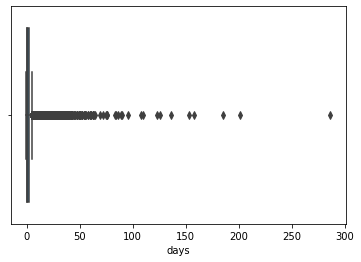

In [16]:
sns.boxplot(CDAG['days'])

In [17]:
CDAG['days'].value_counts()

0.30     284
0.27     278
0.29     253
0.32     249
0.28     248
        ... 
29.27      1
27.80      1
14.99      1
11.90      1
9.95       1
Name: days, Length: 1610, dtype: int64

### Splitting Date and Time

In [18]:
amission_date = []
amission_time = []
for amission_datetime in CDAG['Amission Date']:
    amission_date.append(amission_datetime.date())
    amission_time.append(amission_datetime.time().replace(microsecond=0))

In [19]:
discharge_date = []
discharge_time = []
for discharge_datetime in CDAG['Discharge Date']:
    if(discharge_datetime is not pd.NaT):
        discharge_date.append(discharge_datetime.date())
        discharge_time.append(discharge_datetime.time().replace(microsecond=0))
    else:
        discharge_date.append(0)
        discharge_time.append(0)

In [20]:
CDAG['AMISSION_DATE'] = amission_date
CDAG['AMISSION_TIME'] = amission_time
CDAG['DISCHARGE_DATE'] = discharge_date
CDAG['DISCHARGE_TIME'] = discharge_time

In [21]:
del CDAG["Amission Date"]
del CDAG["Discharge Date"]
del CDAG["Encounter Type"]

### Saving as csv file



In [22]:
CDAG.to_csv('/content/drive/MyDrive/Data-science-project/clean/edited_diagnosis.csv',index=False)

## Labs Dataset


### Load Lab Data

In [23]:
CLab = pd.read_excel('/content/drive/MyDrive/Data-science-project/data/lab results.xlsx')

In [24]:
CLab.head()

,#,Encounter ID,Order Type,Patient ID,Order ID,Result Category,Product Name,Result Name,Result Notes,Normal Range,Unit,RESULT_DATETIME,APPROVE_DATETIME
0,1,219931,Lab,89417,392216,HEMATOLOGY AND COAGULATION,CBC,WBC,5.77,4-15,10^3/µl,2021-01-01 09:01:17.777,2021-01-01 09:08:33.663
1,1,219931,Lab,89417,392216,HEMATOLOGY AND COAGULATION,CBC,LYMPH,2.47,1-4.8,10^3/µl,2021-01-01 09:01:17.790,2021-01-01 09:08:34.677
2,1,219931,Lab,89417,392216,HEMATOLOGY AND COAGULATION,CBC,NEUT,2.59,1.8-7.70,10^3/µl,2021-01-01 09:01:17.790,2021-01-01 09:08:35.820
3,1,219931,Lab,89417,392216,HEMATOLOGY AND COAGULATION,CBC,MONO,0.41,0.0-0.08,NaN,2021-01-01 09:01:17.807,2021-01-01 09:08:36.757
4,1,219931,Lab,89417,392216,HEMATOLOGY AND COAGULATION,CBC,LYMPH%,42.8,0.60-4.10,%,2021-01-01 09:01:17.807,2021-01-01 09:08:37.710


In [25]:
CLab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011250 entries, 0 to 1011249
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   #                 1011250 non-null  int64         
 1   Encounter ID      1011250 non-null  int64         
 2   Order Type        1011250 non-null  object        
 3   Patient ID        1011250 non-null  int64         
 4   Order ID          1011250 non-null  int64         
 5   Result Category   1011250 non-null  object        
 6   Product Name      1011250 non-null  object        
 7   Result Name       1011250 non-null  object        
 8   Result Notes      1011250 non-null  object        
 9   Normal Range      893704 non-null   object        
 10  Unit              960930 non-null   object        
 11  RESULT_DATETIME   1011250 non-null  datetime64[ns]
 12  APPROVE_DATETIME  1011250 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(7)


In [26]:
CLab['Result Notes'].unique()

array(['5.77', '2.47', '2.59', ..., '81.15', '278.7', '84.94'],
      dtype=object)

### Checking for missing values 

In [27]:
CLab.isnull().sum()

#                        0
Encounter ID             0
Order Type               0
Patient ID               0
Order ID                 0
Result Category          0
Product Name             0
Result Name              0
Result Notes             0
Normal Range        117546
Unit                 50320
RESULT_DATETIME          0
APPROVE_DATETIME         0
dtype: int64

### Splitting Date and Time

In [28]:
result_date = []
result_time = []
for result_datetime in CLab['RESULT_DATETIME']:
    result_date.append(result_datetime.date())
    result_time.append(result_datetime.time().replace(microsecond=0))

In [29]:
approve_date = []
approve_time = []
for approve_datetime in CLab['APPROVE_DATETIME']:
    approve_date.append(approve_datetime.date())
    approve_time.append(approve_datetime.time().replace(microsecond=0))

In [30]:
CLab['RESULT_DATE'] = result_date
CLab['RESULT_TIME'] = result_time
CLab['APPROVE_DATE'] = approve_date
CLab['APPROVE_TIME'] = approve_time

In [31]:
del CLab["RESULT_DATETIME"]
del CLab["APPROVE_DATETIME"]

### Saving as csv file

In [32]:
CLab.to_csv('/content/drive/MyDrive/Data-science-project/clean/edited_lab.csv', index=False)

### Vital Signs Dataset

### Load Vitals Data

In [33]:
CVital = pd.read_excel('/content/drive/MyDrive/Data-science-project/data/vital signs.xlsx')

In [34]:
CVital.head()

,#,ENCOUNTER_ID,PATIENT_ID,READ_DATE,HEIGHT,WEIGHT,TEMP,PULSE,RESPIRATORY_RATE,RES_RATE,BP_SYSTOLIC,BP_DIASTOLIC
0,1,219932.0,89418.0,2021-01-01 09:21:08.790,0.0,55.0,37.1,76.0,0.0,100.0,120.0,70.0
1,1,219931.0,89417.0,2021-01-01 09:44:41.523,132.0,41.0,36.9,72.0,0.0,99.0,107.0,60.0
2,1,219933.0,89419.0,2021-01-01 10:17:18.800,104.0,52.0,37.1,113.0,0.0,99.0,122.0,72.0
3,1,219941.0,76880.0,2021-01-01 12:45:45.660,0.0,0.0,36.9,73.0,16.0,98.0,116.0,68.0
4,1,219932.0,89418.0,2021-01-01 13:13:57.583,0.0,0.0,36.7,97.0,22.0,NaN,102.0,87.0


In [35]:
CVital.drop(columns=['#'], inplace=True)

### Checking for missing values

In [36]:
CVital.isnull().sum()

ENCOUNTER_ID             1
PATIENT_ID               1
READ_DATE                1
HEIGHT                   1
WEIGHT                   1
TEMP                 44160
PULSE                35811
RESPIRATORY_RATE         1
RES_RATE            111360
BP_SYSTOLIC              1
BP_DIASTOLIC             1
dtype: int64

In [37]:
CVital.dropna(subset=['READ_DATE'], inplace=True)

### Checking for Data Type

In [38]:
CVital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122377 entries, 0 to 122376
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ENCOUNTER_ID      122377 non-null  float64       
 1   PATIENT_ID        122377 non-null  float64       
 2   READ_DATE         122377 non-null  datetime64[ns]
 3   HEIGHT            122377 non-null  float64       
 4   WEIGHT            122377 non-null  float64       
 5   TEMP              78218 non-null   float64       
 6   PULSE             86567 non-null   float64       
 7   RESPIRATORY_RATE  122377 non-null  float64       
 8   RES_RATE          11018 non-null   float64       
 9   BP_SYSTOLIC       122377 non-null  float64       
 10  BP_DIASTOLIC      122377 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 11.2 MB


In [39]:
CVital = CVital.astype({"ENCOUNTER_ID":"int","PATIENT_ID":"int"})

### Splitting Date and Time

In [40]:
read_date = []
read_time = []
for read_datetime in CVital['READ_DATE']:
    read_date.append(read_datetime.date())
    read_time.append(read_datetime.time().replace(microsecond=0))


In [41]:
CVital['READ_NDATE'] = read_date
CVital['READ_TIME'] = read_time

In [42]:
del CVital["READ_DATE"]

### Saving as csv file

In [43]:
CVital.to_csv('/content/drive/MyDrive/Data-science-project/clean/edited_vital.csv', index=False)

## Medications Dataset

### Load Medication Data

In [44]:
CMed =pd.read_excel('/content/drive/MyDrive/Data-science-project/data/medication.xlsx')

In [45]:
CMed.head()

,#,EncounterID,Patient ID,Product Name,Instructions,Order Date Time,Applied Date Time
0,1,219932,89418,CEFAZOLIN 1 G,give 500 mg 1*3 iv,2021-01-01 09:15:05.330,2021-01-01 19:58:43.280
1,1,219932,89418,CEFAZOLIN 1 G,give 500 mg 1*3 iv,2021-01-01 09:15:05.330,2021-01-02 06:30:17.220
2,1,219932,89418,PERFALGAN 10 MG/ML,GIVE 500 MG IV 1*3,2021-01-01 09:15:05.330,2021-01-01 14:14:11.213
3,1,219932,89418,PERFALGAN 10 MG/ML,GIVE 500 MG IV 1*3,2021-01-01 09:15:05.330,2021-01-01 19:58:32.820
4,1,219932,89418,PERFALGAN 10 MG/ML,GIVE 500 MG IV 1*3,2021-01-01 09:15:05.330,2021-01-01 23:17:57.623


In [46]:
CMed.drop(columns=['#'], inplace=True)

### Checking for missing values

In [47]:
CMed.isnull().sum()

EncounterID             0
Patient ID              0
Product Name            0
Instructions         7387
Order Date Time         0
Applied Date Time       0
dtype: int64

In [48]:
CMed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510270 entries, 0 to 510269
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   EncounterID        510270 non-null  int64         
 1   Patient ID         510270 non-null  int64         
 2   Product Name       510270 non-null  object        
 3   Instructions       502883 non-null  object        
 4   Order Date Time    510270 non-null  datetime64[ns]
 5   Applied Date Time  510270 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 23.4+ MB


### Splitting Date and Time

In [49]:
applied_date = []
applied_time = []
for applied_datetime in CMed['Applied Date Time']:
    applied_date.append(applied_datetime.date())
    applied_time.append(applied_datetime.time().replace(microsecond=0))

In [50]:
order_date = []
order_time = []
for order_datetime in CMed['Order Date Time']:
    order_date.append(order_datetime.date())
    order_time.append(order_datetime.time().replace(microsecond=0))

In [51]:
CMed['APPLIED_DATE'] = applied_date
CMed['APPLIED_TIME'] = applied_time
CMed['ORDER_DATE'] = order_date
CMed['ORDER_TIME'] = order_time

In [52]:
del CMed["Order Date Time"]
del CMed["Applied Date Time"]

### Saving as csv file

In [53]:
CMed.to_csv('/content/drive/MyDrive/Data-science-project/clean/edited_medication.csv',index=False)

#Hospital_Data_EDA

##Diagnosis


### Load Diagnosis Data

In [54]:
EDAG = pd.read_csv('/content/drive/MyDrive/Data-science-project/clean/edited_diagnosis.csv')

In [55]:
EDAG.head()

,Encounter ID,Patient ID,Gender,Age,Current_Department_Name,Diagnosis,First Physician Note,days,AMISSION_DATE,AMISSION_TIME,DISCHARGE_DATE,DISCHARGE_TIME
0,219931,89417,Male,12,Pediatric Department,"Valgus deformity, not elsewhere classified, ri...",the above mentioned patient 10 years old admit...,0.42,2021-01-01,07:27:36,2021-01-01,17:28:51
1,219932,89418,Female,14,Pediatric Department,"Flat foot [pes planus] (acquired), unspecified...",the above mentioned patient admitted to our ho...,1.12,2021-01-01,07:46:50,2021-01-02,10:32:59
2,219933,89419,Male,11,Pediatric Department,"Flat foot [pes planus] (acquired), unspecified...",the above mentioned patient 9 years old admitt...,0.31,2021-01-01,08:23:27,2021-01-01,15:49:25
3,219936,89420,Male,57,Medical Surgical Department,Shortness of breath,"presented complaining of SOB, with mild cough ...",1.15,2021-01-01,09:53:18,2021-01-02,13:29:59
4,219938,89421,Male,65,Cardiac Care Unit CCU Department,Non-ST elevation (NSTEMI) myocardial infarction,"A 63 YEARS OLD PATIENT , SMKER , PRESENTID TO ...",2.12,2021-01-01,10:56:19,2021-01-03,13:43:11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


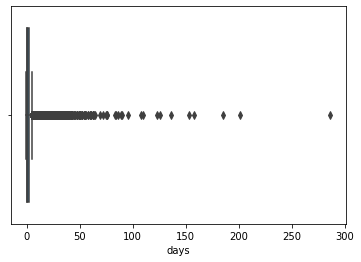

In [56]:
sns.boxplot(EDAG['days'])

In [57]:
EDAG.describe()

,Encounter ID,Patient ID,Age,days
count,15879.000000,1.587900e+04,15879.000000,15872.000000
mean,258863.571132,1.538143e+08,46.199194,2.453103
std,22254.918077,7.381813e+09,22.137496,6.875492
min,219931.000000,1.930000e+02,1.000000,-0.650000
25%,239986.500000,7.296900e+04,31.000000,0.270000
50%,258958.000000,8.914700e+04,50.000000,0.690000
75%,278023.500000,9.944250e+04,63.000000,2.100000
max,297909.000000,4.201611e+11,98.000000,286.010000


##Encounter ID

In [58]:
#check if there is a repetition in Encounter ID
grouped_multiple = EDAG.groupby(['Encounter ID', 'AMISSION_DATE']).size().reset_index(name='counts')
grouped_multiple

,Encounter ID,AMISSION_DATE,counts
0,219931,2021-01-01,1
1,219932,2021-01-01,1
2,219933,2021-01-01,1
3,219936,2021-01-01,1
4,219938,2021-01-01,1
...,...,...,...
15874,297902,2021-12-31,1
15875,297903,2021-12-31,1
15876,297904,2021-12-31,1
15877,297908,2021-12-31,1


In [59]:
grouped_multiple.loc[grouped_multiple['counts'] >1]

,Encounter ID,AMISSION_DATE,counts


##Patient ID

In [60]:
#check if there is a repetition in Patient ID
grouped_multiple1 = EDAG.groupby(['Patient ID', 'AMISSION_DATE']).size().reset_index(name='counts')
grouped_multiple1

,Patient ID,AMISSION_DATE,counts
0,193,2021-05-21,1
1,193,2021-07-28,1
2,329,2021-11-08,1
3,435,2021-10-20,1
4,479,2021-04-07,1
...,...,...,...
15854,320161100151,2021-01-27,1
15855,320161100156,2021-10-19,1
15856,320161100156,2021-12-05,1
15857,420161100038,2021-07-26,1


In [61]:
grouped_multiple1.loc[grouped_multiple1['counts'] >1]

,Patient ID,AMISSION_DATE,counts
235,4185,2021-06-22,2
398,6329,2021-10-09,2
967,18285,2021-02-05,2
1472,34834,2021-09-11,2
4624,76864,2021-02-10,2
4813,77315,2021-02-28,2
6178,83149,2021-07-11,2
6205,83406,2021-01-19,2
6404,84414,2021-09-12,2
6415,84530,2021-09-17,2


##Gender

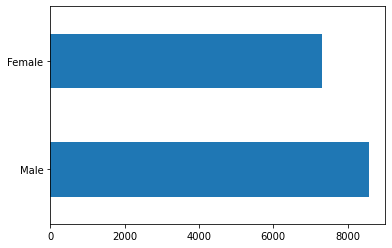

In [62]:
EDAG['Gender'].value_counts()[:20].plot(kind='barh')

##Age And Age Group

In [63]:
EDAG['Age'].value_counts()

1     926
64    434
52    372
62    361
59    348
     ... 
95      4
94      3
97      1
93      1
98      1
Name: Age, Length: 97, dtype: int64

In [64]:
conditions = [
    (EDAG['Age'] <= 18),
    (EDAG['Age']>18)
    ]

values = ['underage', 'adult']

EDAG['Age_Group'] = np.select(conditions, values)

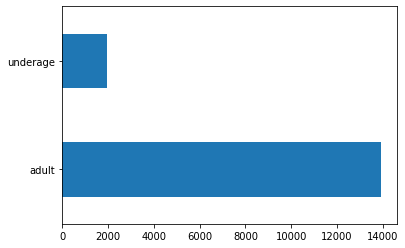

In [65]:
EDAG['Age_Group'].value_counts()[:20].plot(kind='barh')

In [66]:
Adult_EDAG=EDAG.loc[EDAG['Age'] >18]

In [67]:
Adult_EDAG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13921 entries, 3 to 15878
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Encounter ID             13921 non-null  int64  
 1   Patient ID               13921 non-null  int64  
 2   Gender                   13921 non-null  object 
 3   Age                      13921 non-null  int64  
 4   Current_Department_Name  13921 non-null  object 
 5   Diagnosis                13919 non-null  object 
 6   First Physician Note     13834 non-null  object 
 7   days                     13915 non-null  float64
 8   AMISSION_DATE            13921 non-null  object 
 9   AMISSION_TIME            13921 non-null  object 
 10  DISCHARGE_DATE           13921 non-null  object 
 11  DISCHARGE_TIME           13921 non-null  object 
 12  Age_Group                13921 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 1.5+ MB


In [68]:
Adult_EDAG.head()

,Encounter ID,Patient ID,Gender,Age,Current_Department_Name,Diagnosis,First Physician Note,days,AMISSION_DATE,AMISSION_TIME,DISCHARGE_DATE,DISCHARGE_TIME,Age_Group
3,219936,89420,Male,57,Medical Surgical Department,Shortness of breath,"presented complaining of SOB, with mild cough ...",1.15,2021-01-01,09:53:18,2021-01-02,13:29:59,adult
4,219938,89421,Male,65,Cardiac Care Unit CCU Department,Non-ST elevation (NSTEMI) myocardial infarction,"A 63 YEARS OLD PATIENT , SMKER , PRESENTID TO ...",2.12,2021-01-01,10:56:19,2021-01-03,13:43:11,adult
5,219939,89422,Male,73,Orthopedic Neuro Maxillofacial ENT Uro Surgery...,Paresthesia of skin,"72 years old patient with pmhx of DM , HTN , G...",2.16,2021-01-01,11:34:26,2021-01-03,15:31:08,adult
6,219941,76880,Female,47,Chemotherapy Day Care Department,"Malignant neoplasm of uterine adnexa, unspecified",NaN,-0.16,2021-01-01,12:43:13,2021-01-01,08:47:09,adult
7,219945,4881,Female,30,OB GYN &amp;amp;amp;amp; Postnatal Care &amp;a...,38 weeks gestation of pregnancy,"28 yr. lady pregnant\nG2P1A0, by NVD, BIRTH WE...",0.80,2021-01-01,13:21:30,2021-01-02,08:27:37,adult


##Current Department Name

In [69]:
EDAG['Current_Department_Name'].value_counts()

Chemotherapy Day Care Department                                             5786
Orthopedic Neuro Maxillofacial ENT Uro Surgery Department                    1826
OB GYN &amp;amp;amp;amp; Postnatal Care &amp;amp;amp; New Born Department    1677
Medical Surgical Department                                                  1504
Medical Oncology Department                                                  1379
Medium Care Unit MCU Department                                              1180
Pediatric Department                                                         1138
Cardiac Care Unit CCU Department                                              561
Premature and Neonate NICU Department                                         312
Labour Department                                                             266
Intensive Care Unit ICU Department                                            201
Pediatric Intensive Care Unit PICU                                             48
Test Patient    

In [70]:
EDAG.loc[EDAG['Current_Department_Name'] =='Pediatric Department'].head()

,Encounter ID,Patient ID,Gender,Age,Current_Department_Name,Diagnosis,First Physician Note,days,AMISSION_DATE,AMISSION_TIME,DISCHARGE_DATE,DISCHARGE_TIME,Age_Group
0,219931,89417,Male,12,Pediatric Department,"Valgus deformity, not elsewhere classified, ri...",the above mentioned patient 10 years old admit...,0.42,2021-01-01,07:27:36,2021-01-01,17:28:51,underage
1,219932,89418,Female,14,Pediatric Department,"Flat foot [pes planus] (acquired), unspecified...",the above mentioned patient admitted to our ho...,1.12,2021-01-01,07:46:50,2021-01-02,10:32:59,underage
2,219933,89419,Male,11,Pediatric Department,"Flat foot [pes planus] (acquired), unspecified...",the above mentioned patient 9 years old admitt...,0.31,2021-01-01,08:23:27,2021-01-01,15:49:25,underage
44,220147,58764,Male,3,Pediatric Department,"Bronchopneumonia, unspecified organism","cc:fever , dry cough ann decreased oral intae ...",0.74,2021-01-02,15:45:25,2021-01-03,09:34:39,underage
54,220204,89495,Male,2,Pediatric Department,Unspecified fracture of skull,"CC: falling down , head trauma \n\nHPI: karam ...",1.57,2021-01-02,23:20:15,2021-01-04,12:58:52,underage


##Diagnosis

In [71]:
EDAG['Diagnosis'].value_counts()

Secondary malignant neoplasm of breast                                                                                                                                                                                                                 725
Malignant neoplasm of upper lobe, unspecified bronchus or lung                                                                                                                                                                                         520
Person injured in unspecified vehicle accident                                                                                                                                                                                                         451
Multiple myeloma in relapse                                                                                                                                                                                                                            

In [72]:
diagnosis=EDAG['Diagnosis'].unique()

In [73]:
for d in diagnosis:
  print(d)

Valgus deformity, not elsewhere classified, right knee
Flat foot [pes planus] (acquired), unspecified foot
Shortness of breath
Non-ST elevation (NSTEMI) myocardial infarction
Paresthesia of skin
Malignant neoplasm of uterine adnexa, unspecified
38 weeks gestation of pregnancy
Unspecified abdominal pain
Crohn's disease of small intestine with unspecified complications
Malignant neoplasm of stomach, unspecified
Single liveborn infant, delivered vaginally
Chest pain, unspecified
Dyspnea, unspecified
Missed abortion
Secondary malignant neoplasm of breast
Blepharophimosis unspecified eye, unspecified lid
Personal history of malignant neoplasm of ovary
Malignant neoplasm of colon, unspecified
Nontraumatic chronic subdural hemorrhage
Other specified neoplasms of uncertain behavior of lymphoid, hematopoietic and related tissue
Chronic leukemia of unspecified cell type not having achieved remission
Malignant neoplasm of pancreas, unspecified
Malignant neoplasm of sigmoid colon
Encounter for che

In [74]:
EDAG['Diagnosis'].isnull().sum()

2

In [75]:
EDAG[EDAG['Diagnosis'].isna()]
#should be dropped

,Encounter ID,Patient ID,Gender,Age,Current_Department_Name,Diagnosis,First Physician Note,days,AMISSION_DATE,AMISSION_TIME,DISCHARGE_DATE,DISCHARGE_TIME,Age_Group
5360,246503,11096,Male,79,Cardiac Care Unit CCU Department,NaN,NaN,NaN,2021-05-19,09:09:31,0,0,adult
13522,285873,57192,Female,74,Cardiac Care Unit CCU Department,NaN,NaN,-0.37,2021-11-10,08:50:48,2021-11-10,00:00:00,adult


In [76]:
EDAG.loc[EDAG['Diagnosis'] =='Other rheumatic mitral valve diseases']

,Encounter ID,Patient ID,Gender,Age,Current_Department_Name,Diagnosis,First Physician Note,days,AMISSION_DATE,AMISSION_TIME,DISCHARGE_DATE,DISCHARGE_TIME,Age_Group
6411,251549,73677,Male,47,Medium Care Unit MCU Department,Other rheumatic mitral valve diseases,"45 years old male patient, known case of ESRD ...",10.15,2021-06-13,10:49:34,2021-06-23,14:22:09,adult


In [77]:
undrage=EDAG.loc[EDAG['Age_Group'] =='underage']['Encounter ID']

##First Physician Note

In [78]:
EDAG['First Physician Note'].isnull().sum()

94

In [79]:
fpn=EDAG['First Physician Note'].unique()

In [80]:
for fnote in fpn:
  print(fnote)

the above mentioned patient 10 years old admitted to our hospital on 1/1/2021 as a case of right angular limb deformity (valgus deformity ) for surgical Hemiepiphysiodesis and  guided growth .

the patient has history of congenital right limb deformity , with below knee amputation  .
the condition started when family noted that the patient has right knee angulation then the sought a medical advice from dr. tareq sharabati  and the plan was to do Hemiepiphysiodesis of the right knee epiphysis to correct and guided the growth .

past medical history : free 
past surgical history : below knee amputation at birth due to congenital lower limb deformity .
drug or food allergy : patient has allergy from  an  antibiotic but family don


t remember it  , he has allergy from nuts .

on examination :
No respiratory distress, conscious, alert, oriented to person, place & time, GCS 15/15.
- Head & neck: no conjunctiva pallor, no visible wounds, no tenderness, full range of motion.
- Chest: no tende

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



70 years old male.
M+6
FH negative
10/20216 diagnosis prostate ca PSA 140
S/P orechctomy 2016
PSA decrease to 2 2020
PSA increase to 10
10/2020 start casodex PSA decrease to 6
PSMA was done intervale devlopment multiple GA-68 in retroperitoneal and pelvic L.N highly suspected of metastatic L.N , multiple scleritoc lesion without uptake.
Pt came today for cont treatment and evaluation
ON zytiga with zoladex
CT 11/2021 SD
PSA 6
Plan cont the same treatment
Pt cam with report from dr muath for radiation to the prostate

last CT scan was on 10/11/2021 and showed:
Few osteoblastic lesions as described.
Mildly dilated pelvi-calyceal system of rt kidney with associated parenchymal atrophy of the same kidney.
Otherwise, unremarkable exam.

Plan by dr Feras on 18/11/20212:
continue the same treatment.
possible radiation to the prostate.

11/11/2021 PSA level was: 6.11

** TODAY:
the patient came looking well, not in pain or RD and has no new complaints. 

he is on radiotherapy at the AVH; today

##VITALS

### Load Vitals Data

In [81]:
EVitals =pd.read_csv('/content/drive/MyDrive/Data-science-project/clean/edited_vital.csv')

In [82]:
EVitals.head()

,ENCOUNTER_ID,PATIENT_ID,HEIGHT,WEIGHT,TEMP,PULSE,RESPIRATORY_RATE,RES_RATE,BP_SYSTOLIC,BP_DIASTOLIC,READ_NDATE,READ_TIME
0,219932,89418,0.0,55.0,37.1,76.0,0.0,100.0,120.0,70.0,2021-01-01,09:21:08
1,219931,89417,132.0,41.0,36.9,72.0,0.0,99.0,107.0,60.0,2021-01-01,09:44:41
2,219933,89419,104.0,52.0,37.1,113.0,0.0,99.0,122.0,72.0,2021-01-01,10:17:18
3,219941,76880,0.0,0.0,36.9,73.0,16.0,98.0,116.0,68.0,2021-01-01,12:45:45
4,219932,89418,0.0,0.0,36.7,97.0,22.0,NaN,102.0,87.0,2021-01-01,13:13:57


drop underage

In [83]:
# for x in undrage:
#   y = Vitals[ Vitals['ENCOUNTER_ID'] == x ].index
#   Vitals.drop(y, inplace = True)

In [84]:
EVitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122377 entries, 0 to 122376
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ENCOUNTER_ID      122377 non-null  int64  
 1   PATIENT_ID        122377 non-null  int64  
 2   HEIGHT            122377 non-null  float64
 3   WEIGHT            122377 non-null  float64
 4   TEMP              78218 non-null   float64
 5   PULSE             86567 non-null   float64
 6   RESPIRATORY_RATE  122377 non-null  float64
 7   RES_RATE          11018 non-null   float64
 8   BP_SYSTOLIC       122377 non-null  float64
 9   BP_DIASTOLIC      122377 non-null  float64
 10  READ_NDATE        122377 non-null  object 
 11  READ_TIME         122377 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 11.2+ MB


In [85]:
EVitals.describe()

,ENCOUNTER_ID,PATIENT_ID,HEIGHT,WEIGHT,TEMP,PULSE,RESPIRATORY_RATE,RES_RATE,BP_SYSTOLIC,BP_DIASTOLIC
count,122377.000000,1.223770e+05,122377.000000,122377.000000,78218.000000,86567.000000,122377.000000,11018.000000,122377.000000,122377.000000
mean,258086.400786,1.045653e+08,2.457705,4.060757,37.146401,86.530122,4.767000,65.713042,84.058982,48.425848
std,22536.809201,5.871171e+09,19.836019,17.917110,13.558744,23.720446,10.282323,45.433590,57.986660,34.309808
min,219931.000000,1.930000e+02,0.000000,0.000000,-36.500000,1.000000,0.000000,0.500000,0.000000,0.000000
25%,238665.000000,7.617000e+04,0.000000,0.000000,36.400000,75.000000,0.000000,7.000000,0.000000,0.000000
50%,256917.000000,9.250200e+04,0.000000,0.000000,36.600000,83.000000,0.000000,95.000000,110.000000,63.000000
75%,278146.000000,1.010530e+05,0.000000,0.000000,36.800000,94.000000,14.000000,98.000000,125.000000,74.000000
max,297909.000000,4.201611e+11,192.000000,923.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000


###HEIGHT

In [86]:
EVitals['HEIGHT'].value_counts()

0.0      120352
170.0       135
165.0       111
173.0        86
157.0        82
          ...  
179.5         1
178.5         1
125.0         1
36.8          1
3.7           1
Name: HEIGHT, Length: 134, dtype: int64

In [87]:
moreThanZero=EVitals.loc[EVitals['HEIGHT'] > 0]['PATIENT_ID'].unique()

In [88]:
len(moreThanZero)

710

In [89]:
Number=0
for x in moreThanZero:
  for y in EVitals['PATIENT_ID']:
    if(x==y):
      Number=Number+1

In [90]:
Number

24284

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


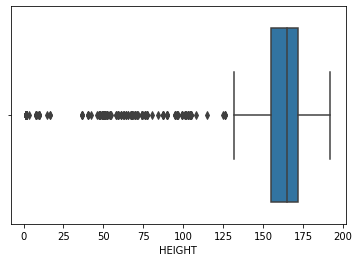

In [91]:
sns.boxplot(EVitals.loc[EVitals['HEIGHT'] > 0]['HEIGHT'])

In [92]:
EVitals.loc[EVitals['HEIGHT'] == 3.7]

,ENCOUNTER_ID,PATIENT_ID,HEIGHT,WEIGHT,TEMP,PULSE,RESPIRATORY_RATE,RES_RATE,BP_SYSTOLIC,BP_DIASTOLIC,READ_NDATE,READ_TIME
62463,260426,101181,3.7,0.0,NaN,NaN,0.0,NaN,0.0,0.0,2021-07-24,21:15:52


In [93]:
# Vitals.drop(Vitals.index[Vitals['HEIGHT'] == 3.7], inplace=True)

### WEIGHT

In [94]:
EVitals['WEIGHT'].value_counts()

0.00      113863
70.00        170
80.00        137
90.00        136
72.00        132
           ...  
4.95           1
64.70          1
84.50          1
181.50         1
60.90          1
Name: WEIGHT, Length: 761, dtype: int64

In [95]:
moreThanZeroWeight=EVitals.loc[(EVitals['WEIGHT'] > 0)&(EVitals['WEIGHT'] < 190)]['PATIENT_ID'].unique()

In [96]:
len(moreThanZeroWeight)

2716

In [97]:
NumberOfWeight=0
for xx in moreThanZeroWeight:
  for yy in EVitals['PATIENT_ID']:
    if(xx==yy):
      NumberOfWeight=NumberOfWeight+1

In [98]:
NumberOfWeight

55220

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


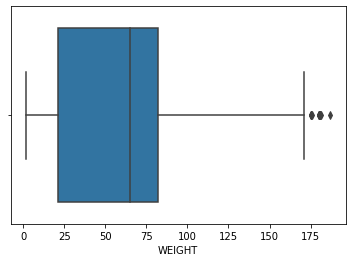

In [99]:
sns.boxplot(EVitals.loc[(EVitals['WEIGHT'] > 0) & (EVitals['WEIGHT'] < 190)]['WEIGHT'])

In [100]:
EVitals.loc[EVitals['WEIGHT'] > 190]

,ENCOUNTER_ID,PATIENT_ID,HEIGHT,WEIGHT,TEMP,PULSE,RESPIRATORY_RATE,RES_RATE,BP_SYSTOLIC,BP_DIASTOLIC,READ_NDATE,READ_TIME
50429,252533,77042,163.0,923.0,36.7,88.0,0.0,NaN,141.0,86.0,2021-06-17,13:32:34
50849,252533,77042,163.0,923.0,NaN,NaN,0.0,NaN,0.0,0.0,2021-06-18,22:42:23
50987,252533,77042,163.0,923.0,NaN,NaN,0.0,NaN,0.0,0.0,2021-06-19,09:25:59


###TEMP

In [101]:
EVitals['TEMP'] = EVitals['TEMP'].replace(np.nan, 0)

In [102]:
EVitals.loc[(EVitals['TEMP'] > 45)]['TEMP'].unique()

array([365. , 369. ,  63.5,  63.8, 364. , 363. ,  69.7, 121. , 368. ,
        88. , 362. , 396.4,  63.4, 369.1, 375. , 365.8, 133. , 363.6,
       366. ,  99. ,  63.9,  98. , 367. ,  86. ,  97. ,  87. , 366.7,
       371. ,  94. , 108. ,  68. , 366.3, 166. ,  76. , 372. ,  80. ,
       337.5,  73.6, 110. , 113. ,  74. ,  63.3, 367.5,  85. ,  46.3,
       936.8, 363.8,  46.6,  63.7,  73.1, 115. ,  63.6, 336.4, 336.9,
        63.1, 146. , 100. , 999. ,  73. , 636. , 366.6,  60. ,  82. ,
       366.5,  66.9, 346.6, 361. , 336.5,  63. , 363.3,  63.2,  96.3,
        69. ,  83.5, 167. , 112. , 123. , 366.9,  95. ,  83. , 142. ,
        69.8,  57. , 381. ,  73.5,  46.8, 134. ,  93.4, 130. ])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


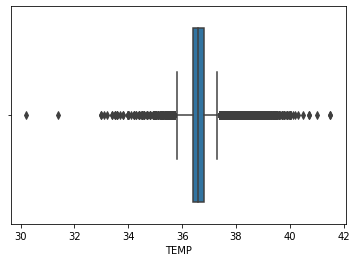

In [103]:
sns.boxplot(EVitals.loc[(EVitals['TEMP'] > 30)&(EVitals['TEMP'] < 45)]['TEMP'])

In [104]:
moreThanZeroTemp=EVitals.loc[(EVitals['TEMP'] > 30)&(EVitals['TEMP'] < 45)]['PATIENT_ID'].unique()

In [105]:
len(moreThanZeroTemp)

6841

In [106]:
NumberOfTemp=0
for xx in moreThanZeroTemp:
  for yy in EVitals['PATIENT_ID']:
    if(xx==yy):
      NumberOfTemp=NumberOfTemp+1

In [107]:
NumberOfTemp

121232

In [108]:
EVitals.loc[EVitals['TEMP'] ==999]

,ENCOUNTER_ID,PATIENT_ID,HEIGHT,WEIGHT,TEMP,PULSE,RESPIRATORY_RATE,RES_RATE,BP_SYSTOLIC,BP_DIASTOLIC,READ_NDATE,READ_TIME
66375,263001,52834,0.0,0.0,999.0,85.0,0.0,NaN,123.0,57.0,2021-08-05,16:51:48


In [109]:
outrangheat=EVitals.loc[((EVitals['TEMP'] <30) | (EVitals['TEMP'] >42))&(EVitals['TEMP'] !=0.0)]
outrangheat

,ENCOUNTER_ID,PATIENT_ID,HEIGHT,WEIGHT,TEMP,PULSE,RESPIRATORY_RATE,RES_RATE,BP_SYSTOLIC,BP_DIASTOLIC,READ_NDATE,READ_TIME
145,220152,79312,0.0,0.0,3.00,115.0,0.0,NaN,123.0,86.0,2021-01-03,02:40:47
635,220575,89617,0.0,0.0,365.00,73.0,0.0,97.0,113.0,62.0,2021-01-06,04:54:55
965,219978,89437,0.0,0.0,369.00,80.0,0.0,NaN,110.0,70.0,2021-01-07,12:10:34
1866,220911,88644,0.0,0.0,63.50,95.0,0.0,NaN,107.0,52.0,2021-01-11,09:14:06
1902,221855,21034,0.0,0.0,369.00,71.0,0.0,NaN,126.0,67.0,2021-01-11,11:39:52
...,...,...,...,...,...,...,...,...,...,...,...,...
118984,296652,9800,0.0,0.0,3.64,68.0,0.0,NaN,100.0,45.0,2021-12-28,10:08:33
119343,297354,111484,0.0,0.0,63.00,77.0,16.0,NaN,140.0,88.0,2021-12-29,10:14:50
121160,297834,109051,0.0,0.0,63.50,77.0,16.0,NaN,135.0,78.0,2022-01-06,16:49:20
121568,291961,87361,0.0,0.0,83.00,83.0,16.0,NaN,111.0,60.0,2022-01-11,08:48:08


In [110]:
inrangheat=EVitals.loc[(EVitals['TEMP'] >30) | (EVitals['TEMP'] <42) |(EVitals['TEMP'] ==0)]
inrangheat

,ENCOUNTER_ID,PATIENT_ID,HEIGHT,WEIGHT,TEMP,PULSE,RESPIRATORY_RATE,RES_RATE,BP_SYSTOLIC,BP_DIASTOLIC,READ_NDATE,READ_TIME
0,219932,89418,0.0,55.0,37.1,76.0,0.0,100.0,120.0,70.0,2021-01-01,09:21:08
1,219931,89417,132.0,41.0,36.9,72.0,0.0,99.0,107.0,60.0,2021-01-01,09:44:41
2,219933,89419,104.0,52.0,37.1,113.0,0.0,99.0,122.0,72.0,2021-01-01,10:17:18
3,219941,76880,0.0,0.0,36.9,73.0,16.0,98.0,116.0,68.0,2021-01-01,12:45:45
4,219932,89418,0.0,0.0,36.7,97.0,22.0,NaN,102.0,87.0,2021-01-01,13:13:57
...,...,...,...,...,...,...,...,...,...,...,...,...
122372,293644,110431,0.0,0.0,0.0,69.0,0.0,NaN,144.0,57.0,2022-02-14,17:09:56
122373,296498,111208,0.0,0.0,36.5,112.0,16.0,NaN,102.0,69.0,2022-02-14,17:23:11
122374,293644,110431,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,2022-02-14,19:31:39
122375,296498,111208,0.0,0.0,36.1,115.0,15.0,4.0,109.0,52.0,2022-02-15,01:03:58


### PULSE

In [111]:
EVitals['PULSE'].value_counts()

80.0     4385
88.0     3653
78.0     3399
77.0     3276
75.0     3123
         ... 
191.0       1
1.3         1
30.0        1
29.0        1
33.0        1
Name: PULSE, Length: 226, dtype: int64

In [112]:
EVitals.loc[(EVitals['PULSE'] > 50)&(EVitals['PULSE'] < 100)]['PULSE'].count()

70244

In [113]:
EVitals.loc[(EVitals['PULSE'] < 50)|(EVitals['PULSE'] > 100)]['PULSE'].count()

14601

In [114]:
EVitals.loc[(EVitals['PULSE'] < 50)|(EVitals['PULSE'] > 100)]['PULSE'].unique()

array([113. , 102. , 123. , 105. , 119. , 112. , 125. , 140. , 136. ,
       127. , 124. , 104. , 122. , 109. , 115. , 114. , 111. , 107. ,
       133. , 120. , 130. , 106. , 103. , 151. , 126. , 999. , 110. ,
       117. , 121. , 101. , 108. , 134. ,  36. , 153. , 157. , 147. ,
       128. , 129. , 170. , 116. ,   1. , 158. , 143. , 118. , 150. ,
        10. , 145. , 135. , 132. , 156. , 131. , 155. , 142. , 137. ,
       152. , 138. ,  36.8, 141. ,  36.9, 148. , 166. , 154. , 160. ,
       169. , 164. , 162. , 207. , 139. ,  15. , 882. , 159. , 177. ,
        48. ,  16. , 144. , 180. , 146. ,   4. ,   9. , 165. , 200. ,
       178. , 188. , 185. , 168. ,  11. , 167. , 175. ,  39. ,   8. ,
       149. ,  40. , 790. ,  44. ,  43. , 787. , 225. , 174. ,  14. ,
        46. , 811. ,  47. ,  49. , 182. , 756. , 711. , 773. , 886. ,
       181. ,  37. , 161. ,  36.6,  45. ,  18. ,  35. ,  22. ,  17. ,
       172. , 873. ,  32. ,  42. ,  36.5,  12. , 740. , 184. ,   3. ,
         7. , 800. ,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


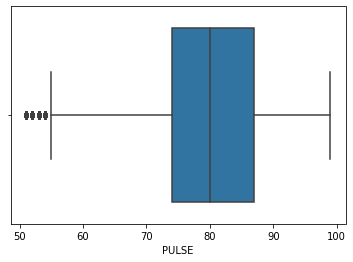

In [115]:
sns.boxplot(EVitals.loc[(EVitals['PULSE'] > 50)&(EVitals['PULSE'] < 100)]['PULSE'])

### RESPIRATORY_RATE

In [116]:
EVitals['RESPIRATORY_RATE'].value_counts()

0.0      90167
16.0      5956
18.0      5935
17.0      4561
15.0      2932
         ...  
64.0         1
147.0        1
123.0        1
96.0         1
106.0        1
Name: RESPIRATORY_RATE, Length: 105, dtype: int64

In [117]:
EVitals.loc[((EVitals['RESPIRATORY_RATE'] < 10)|(EVitals['RESPIRATORY_RATE'] > 40)) & (EVitals['RESPIRATORY_RATE']  !=0.0)]['RESPIRATORY_RATE'].count()

198

In [118]:
EVitals.loc[(EVitals['RESPIRATORY_RATE'] < 10)|(EVitals['RESPIRATORY_RATE'] > 40)]['RESPIRATORY_RATE'].unique()

array([  0.,  45.,  42.,  48.,  43.,  41.,  51.,  50., 418.,  98.,   2.,
         1.,   5.,  87., 999., 417.,  44.,   3.,  46.,   4.,  66.,  68.,
        82., 100.,   8.,   7.,  60., 119., 116., 118., 117.,  75.,  63.,
        61., 165.,  74.,  81.,  95.,  78.,  85.,  80.,   6.,  76.,  71.,
        92., 125., 167.,  64., 147., 123.,  55.,  96.,  99.,  54.,  73.,
        97.,  88., 104., 160.,  90., 120.,  70., 148., 145.,  77.,  56.,
        79.,   9.,  94., 106.])

In [119]:
EVitals.loc[(EVitals['RESPIRATORY_RATE'] > 10)&(EVitals['RESPIRATORY_RATE'] < 40) | (EVitals['RESPIRATORY_RATE'] == 0.0)]['RESPIRATORY_RATE'].count()

122105

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


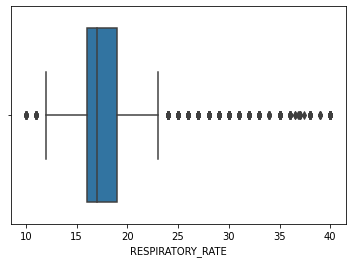

In [120]:
sns.boxplot(EVitals.loc[(EVitals['RESPIRATORY_RATE'] >= 10)&(EVitals['RESPIRATORY_RATE'] <= 40)]['RESPIRATORY_RATE'])

### RES_RATE

In [121]:
EVitals['RES_RATE'].value_counts()

98.0     1323
99.0     1098
100.0     968
97.0      932
96.0      755
         ... 
54.0        1
72.0        1
109.0       1
36.7        1
2.5         1
Name: RES_RATE, Length: 91, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


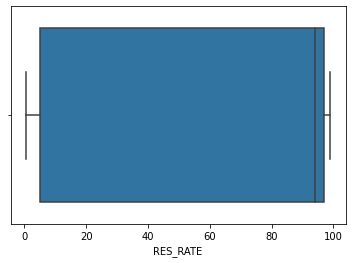

In [122]:
sns.boxplot(EVitals.loc[(EVitals['RES_RATE'] < 100)]['RES_RATE'])

### BP_SYSTOLIC

In [123]:
EVitals['BP_SYSTOLIC'].value_counts()

0.0      37118
110.0     2896
100.0     2633
124.0     2578
122.0     2522
         ...  
13.0         1
702.0        1
232.0        1
26.0         1
993.0        1
Name: BP_SYSTOLIC, Length: 198, dtype: int64

In [124]:
EVitals.loc[(EVitals['BP_SYSTOLIC'] < 90)|(EVitals['BP_SYSTOLIC'] > 180)]['BP_SYSTOLIC'].count()

39509

In [125]:
EVitals.loc[(EVitals['BP_SYSTOLIC'] < 90)|(EVitals['BP_SYSTOLIC'] > 180)]['BP_SYSTOLIC'].unique()


array([  0.,  87.,  85.,  79.,  89.,  13.,  80.,  78.,  88.,  68.,  84.,
        83., 702.,  81.,  66.,  86.,  74., 218.,  60.,  71.,  82.,  76.,
        75., 186.,  10., 187.,  59.,  67.,  73., 181.,  77.,  11., 182.,
       184.,  70., 192., 232., 195.,  72., 188.,  64., 185., 810.,  29.,
       190.,  26., 199., 193., 194., 198., 220.,  62., 197., 183., 189.,
       191.,  69.,  65.,  50., 200., 204.,  15.,  54., 205., 202., 999.,
       207.,  55.,  52.,  40.,  42.,  32.,  51.,  45.,  38.,  27.,  30.,
        63., 852.,  20., 196.,  18., 214.,  44.,  47.,  53.,  43.,   2.,
       203., 206.,  46., 435., 781., 268.,  41.,  48., 210., 213., 208.,
       201.,  61., 238., 245.,  12.,   1., 223., 993.])

In [126]:
EVitals.loc[(EVitals['BP_SYSTOLIC'] > 90)&(EVitals['BP_SYSTOLIC'] < 180)]['BP_SYSTOLIC'].count()

81953

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


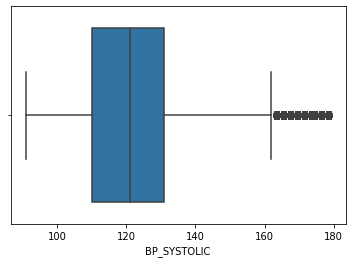

In [127]:
sns.boxplot(EVitals.loc[(EVitals['BP_SYSTOLIC'] > 90)&(EVitals['BP_SYSTOLIC'] < 180)]['BP_SYSTOLIC'])

### BP_DIASTOLIC

In [128]:
EVitals['BP_DIASTOLIC'].value_counts()

0.0      37172
70.0      4142
60.0      4130
65.0      3932
74.0      3517
         ...  
789.0        1
10.0         1
140.0        1
5.0          1
18.0         1
Name: BP_DIASTOLIC, Length: 141, dtype: int64

In [129]:
EVitals.loc[(EVitals['BP_DIASTOLIC'] < 40)|(EVitals['BP_DIASTOLIC'] > 100)]['BP_DIASTOLIC'].count()

37955

In [130]:
EVitals.loc[(EVitals['BP_DIASTOLIC'] > 40)&(EVitals['BP_DIASTOLIC'] < 100)]['BP_DIASTOLIC'].count()

84067

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


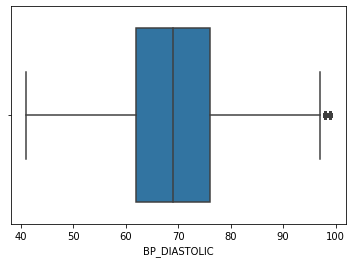

In [131]:
sns.boxplot(EVitals.loc[(EVitals['BP_DIASTOLIC'] > 40)&(EVitals['BP_DIASTOLIC'] < 100)]['BP_DIASTOLIC'])

##Lab

## Load Lab Data

In [132]:
ELab = pd.read_csv('/content/drive/MyDrive/Data-science-project/clean/edited_lab.csv')

In [133]:
ELab

,#,Encounter ID,Order Type,Patient ID,Order ID,Result Category,Product Name,Result Name,Result Notes,Normal Range,Unit,RESULT_DATE,RESULT_TIME,APPROVE_DATE,APPROVE_TIME
0,1,219931,Lab,89417,392216,HEMATOLOGY AND COAGULATION,CBC,WBC,5.77,4-15,10^3/µl,2021-01-01,09:01:17,2021-01-01,09:08:33
1,1,219931,Lab,89417,392216,HEMATOLOGY AND COAGULATION,CBC,LYMPH,2.47,1-4.8,10^3/µl,2021-01-01,09:01:17,2021-01-01,09:08:34
2,1,219931,Lab,89417,392216,HEMATOLOGY AND COAGULATION,CBC,NEUT,2.59,1.8-7.70,10^3/µl,2021-01-01,09:01:17,2021-01-01,09:08:35
3,1,219931,Lab,89417,392216,HEMATOLOGY AND COAGULATION,CBC,MONO,0.41,0.0-0.08,NaN,2021-01-01,09:01:17,2021-01-01,09:08:36
4,1,219931,Lab,89417,392216,HEMATOLOGY AND COAGULATION,CBC,LYMPH%,42.8,0.60-4.10,%,2021-01-01,09:01:17,2021-01-01,09:08:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011245,1,296817,Lab,5449,562479,HEMATOLOGY AND COAGULATION,CBC,EO,0.12,0.00-0.50,10^3/ μl,2022-02-14,19:01:37,2022-02-14,20:04:32
1011246,1,296817,Lab,5449,562479,HEMATOLOGY AND COAGULATION,CBC,PDW,14.8,0.1-99.9,fl,2022-02-14,19:01:37,2022-02-14,20:04:31
1011247,1,296817,Lab,5449,562479,HEMATOLOGY AND COAGULATION,CBC,BASO,0.08,0.0-0.2,10^3/ μl,2022-02-14,19:01:37,2022-02-14,20:04:32
1011248,1,296817,Lab,5449,562479,HEMATOLOGY AND COAGULATION,CBC,BASO%,0.6,0.0-0.10,%,2022-02-14,19:01:37,2022-02-14,20:04:33


In [134]:
ELab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011250 entries, 0 to 1011249
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   #                1011250 non-null  int64 
 1   Encounter ID     1011250 non-null  int64 
 2   Order Type       1011250 non-null  object
 3   Patient ID       1011250 non-null  int64 
 4   Order ID         1011250 non-null  int64 
 5   Result Category  1011250 non-null  object
 6   Product Name     1011250 non-null  object
 7   Result Name      1011250 non-null  object
 8   Result Notes     1011250 non-null  object
 9   Normal Range     893704 non-null   object
 10  Unit             960930 non-null   object
 11  RESULT_DATE      1011250 non-null  object
 12  RESULT_TIME      1011250 non-null  object
 13  APPROVE_DATE     1011250 non-null  object
 14  APPROVE_TIME     1011250 non-null  object
dtypes: int64(4), object(11)
memory usage: 115.7+ MB


##Encounter ID	

In [135]:
ELab['Encounter ID'].value_counts()

259941    7544
259176    6716
240487    6543
245658    4099
255728    3655
          ... 
256768       1
288760       1
263037       1
239384       1
261482       1
Name: Encounter ID, Length: 11833, dtype: int64

In [313]:
Lab259941=ELab.loc[ELab['Encounter ID'] ==259941]
Lab259941.to_csv('/content/drive/MyDrive/Data-science-project/clean/Lab259941.csv',index=False)

In [314]:
DAG259941=Adult_EDAG.loc[Adult_EDAG['Encounter ID'] ==259941]
DAG259941.to_csv('/content/drive/MyDrive/Data-science-project/clean/DAG259941.csv', index=False)

In [315]:
Vitals259941=EVitals.loc[EVitals['ENCOUNTER_ID'] ==259941]
Vitals259941.to_csv('/content/drive/MyDrive/Data-science-project/clean/Vitals259941.csv',index=False)

In [316]:
Med259941=EMed.loc[EMed['EncounterID'] ==259941]
Med259941.to_csv('/content/drive/MyDrive/Data-science-project/clean/Med259941.csv',index=False)

In [141]:
ELab['Patient ID'].value_counts()

101050    7544
100812    6716
85795     6543
88644     4206
65378     4151
          ... 
101896       1
105205       1
101170       1
99999        1
103943       1
Name: Patient ID, Length: 7010, dtype: int64

##Result Category

In [158]:
ELab['Result Category'].value_counts()

HEMATOLOGY AND COAGULATION    879153
CHEMISTRY                     132097
Name: Result Category, dtype: int64

In [159]:
ELab[ELab['Result Category'].isna()]

,#,Encounter ID,Order Type,Patient ID,Order ID,Result Category,Product Name,Result Name,Result Notes,Normal Range,Unit,RESULT_DATE,RESULT_TIME,APPROVE_DATE,APPROVE_TIME


##Product Name

In [145]:
ELab['Product Name'].value_counts()

CBC                                856365
Creatinine, serum                   28382
PT                                  22788
CRP                                 21725
Blood Urea Nitrogen (Bun)           21291
SGOT (AST)                          12713
SGPT (ALT)                          12712
Albumin                             11791
Bilirubin (T)                       10517
Bilirubin (D)                        6503
ALK-Phosphatase                      5185
Triglycerides                         362
Gamma Glutamyl Transferase(GGT)       311
HDL - cholesterol                     306
Cholesterol                           299
Name: Product Name, dtype: int64

In [160]:
ELab[ELab['Product Name'].isna()]

,#,Encounter ID,Order Type,Patient ID,Order ID,Result Category,Product Name,Result Name,Result Notes,Normal Range,Unit,RESULT_DATE,RESULT_TIME,APPROVE_DATE,APPROVE_TIME


##Result Name

In [161]:
ELab['Result Name'].value_counts()

WBC                                38926
MCH                                38926
MPV                                38926
PLT                                38926
RDW-SD                             38926
MCHC                               38926
RDW%                               38926
MCV                                38926
RBC                                38926
HCT                                38926
Hb                                 38926
MONO%                              38926
NEUT%                              38926
LYMPH%                             38926
MONO                               38926
NEUT                               38926
LYMPH                              38926
BASO%                              38925
EO%                                38925
EO                                 38925
BASO                               38925
PDW                                38923
Creatinine, serum                  28382
CRP                                21725
Blood Urea Nitro

In [162]:
ELab.loc[ELab['Result Name']=='PDW']

,#,Encounter ID,Order Type,Patient ID,Order ID,Result Category,Product Name,Result Name,Result Notes,Normal Range,Unit,RESULT_DATE,RESULT_TIME,APPROVE_DATE,APPROVE_TIME
19,1,219931,Lab,89417,392216,HEMATOLOGY AND COAGULATION,CBC,PDW,9.1,0.1-99.9,fl,2021-01-01,09:01:17,2021-01-01,09:08:50
39,1,219933,Lab,89419,392217,HEMATOLOGY AND COAGULATION,CBC,PDW,9.8,0.1-99.9,fl,2021-01-01,09:01:30,2021-01-01,09:07:58
62,1,219932,Lab,89418,392220,HEMATOLOGY AND COAGULATION,CBC,PDW,12.6,0.1-99.9,fl,2021-01-01,09:01:38,2021-01-01,09:09:31
84,1,219936,Lab,89420,392231,HEMATOLOGY AND COAGULATION,CBC,PDW,11.5,0.1-99.9,fl,2021-01-01,10:29:52,2021-01-01,10:33:29
109,1,219938,Lab,89421,392243,HEMATOLOGY AND COAGULATION,CBC,PDW,12.0,0.1-99.9,fl,2021-01-01,11:26:50,2021-01-01,11:29:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011145,1,296817,Lab,5449,561572,HEMATOLOGY AND COAGULATION,CBC,PDW,-,0.1-99.9,fl,2022-02-13,07:34:30,2022-02-13,07:34:34
1011169,1,296817,Lab,5449,561978,HEMATOLOGY AND COAGULATION,CBC,PDW,-,0.1-99.9,fl,2022-02-13,18:56:20,2022-02-13,18:56:38
1011200,1,296817,Lab,5449,562135,HEMATOLOGY AND COAGULATION,CBC,PDW,-,0.1-99.9,fl,2022-02-14,05:50:04,2022-02-14,05:50:20
1011227,1,295932,Lab,111047,562102,HEMATOLOGY AND COAGULATION,CBC,PDW,-,0.1-99.9,fl,2022-02-14,08:08:29,2022-02-14,08:08:35


In [163]:
ELab[ELab['Result Name'].isna()]

,#,Encounter ID,Order Type,Patient ID,Order ID,Result Category,Product Name,Result Name,Result Notes,Normal Range,Unit,RESULT_DATE,RESULT_TIME,APPROVE_DATE,APPROVE_TIME


##Result Notes

In [164]:
ResultNote=ELab['Result Notes'].unique()

In [165]:
for note in ResultNote:
  print(note)

Streaming output truncated to the last 5000 lines.
176.85
93.31
75.68
181.8
27.21
54.54
336.6
998
66.16
71.73
22.28
368.3
198.02
83.34
33.27
53.40
83.98
201.5
77.02
67.22
81.83
165.0
0.937
156.39
1.492
4.316
4.008
1.248
75.62
95.38
143.44
210.78
1453.0
11160
119.71
35.74
47.94
30.14
148.52
43.67
151.17
31.89
160.07
81.89
118.24
2.327
43.03
4.489
120.12
102.92
244.4
192.2
2.533
2.719
0.935
175.58
52.22
170.98
195.07
114.24
3.016
257.14
246.3
2.702
2.276
3.102
69.11
273.51
28.19
54.59
242.13
146.51
10.550
7.684
1.937
105.82
8.404
151.46
166.6
174.94
298.92
10.334
14.464
137.83
1.478
314.31
1.886
63.15
170.40
40.16
41.16
2.783
41.09
54.95
2.161
919
69.32
185.8
89.56
247.6
75.96
6.571
166.53
1.709
2.942
2785
1381
263.5
194.9
56.35
11.762
8.606
9.030
3.856
108.75
2324
11.171
13.886
8.586
13.157
5.313
92.26
362.7
91.10
442.3
2.105
37.41
15.396
11.785
2097
49.57
37.79
343.9
194.7
63.69
301.3
333.3
9.065
136.0
59.05
91.92
146.03
86.57
183.4
82.26
207.2
90.51
185.0
312.0
358.0
1.534
1.945
43.02

In [166]:
for result_note in ELab['Result Notes'].unique():
  try:
    float(result_note)
  except ValueError:
      print(result_note)

----
-
--
---
`0.5
-*-
12.4`
>90
>5
over max :> 90
> 5.0
181.9 Need Conformation
> Max
10 (Ascitic Fluid)
>70
16 (in fluid)
32.5 fluid sample
>Max
-3.6--
0.59 (In Fluid)
Over max : > 90
OVER MAX : >5.0
over max >90
Over max
161 (from citrate)
>100
>5.0/conf dr.zain
>5.0
> 90
>5.00
>6
---8.8
conf
`
-----
.....
> max ( > 5 )
> max ( >5 )
1.4   in fluid
0.59   (In Fluid)
0.40 (fluid sample)
max<
62%
200.7 (body fluid)
2.09`
....
52(conf)
*
...
94 (Ascitic Fluid)
0.72 ( in fluid )
need conf
>50
>4.00
Over max : > 5
Over max : >90 sec
35 FROM CITRATE
-*
> Max ( > 90 )
4.06 (in pleural fluid)
18.4 (in pleural fluid)
Over Max : > 5.0
Over max : >90 s
24.1     Drain
0.75     Drain
2.4    (Pleural Fluid)
..
>90.0
> 100
.


In [167]:
result_counter=0
for result_note in ELab['Result Notes']:
  try:
    float(result_note)
  except ValueError:
      result_counter=result_counter+1
      # print(result_note)
print(result_counter)

9563


In [168]:
# Lab["Result Notes"].replace({"----": 0, '---':0,'--':0,'-':0, '`0.5':0.5, '-*-':0, '12.4`':12.4,'>90':90}, inplace=True)


##Normal Range

In [169]:
ELab['Normal Range'].unique()

array(['4-15', '1-4.8', '1.8-7.70', '0.0-0.08', '0.60-4.10', '2.0-7.80',
       '0.0-14', '10.3-15.7', '30.0-46.0', '4.20-6.30', '25.0-30.0',
       '75.0-87.0', '11.0-16.0', '32.0-36.0', '37.0-54.0', '140-440',
       '8-11', '0.0-0.2', '0.00-0.50', '0.1-99.9', '0.0-0.10', '0.0-0.40',
       nan, '6-20', '4-11', '20-50', '4.70-6.30', '14.0-18.0',
       '42.0-52.0', '26.0-32.0', '76.0-97.0', '31.0-37.0', '8-23',
       '11-15', '1.1-1.2', '12.0-14.0', '37.0-51.0', '80.0-97.0',
       '31.0-36.0', '10-41', '0-40', '0 -0.2', '6-18', '30-75', '2.3-68',
       '9.5-15.0', '3.90-5.50', '29.0-54', '74-99', '24.0-34.0',
       '31.0-35.0', '140-570', '0.0-6.0', '0.0-1.0', '10-33', '0-32',
       '5-18', '0-0.2', '4-19', '6-42', '10-71', '6-20\n8-23'],
      dtype=object)

In [170]:
ELab['Normal Range'].value_counts()

8-11          38924
0.1-99.9      38921
1.8-7.70      38732
0.0-0.08      38732
1-4.8         38732
              ...  
2.0-7.80        704
0.60-4.10       704
10-71           183
6-42            128
6-20\n8-23        1
Name: Normal Range, Length: 61, dtype: int64

In [171]:
ELab['Normal Range'].isnull().sum()

117546

In [172]:
ELab[ELab['Normal Range'].isna()]

,#,Encounter ID,Order Type,Patient ID,Order ID,Result Category,Product Name,Result Name,Result Notes,Normal Range,Unit,RESULT_DATE,RESULT_TIME,APPROVE_DATE,APPROVE_TIME
44,1,219932,Lab,89418,392220,HEMATOLOGY AND COAGULATION,CBC,WBC,5.81,NaN,10^3/µl,2021-01-01,09:01:38,2021-01-01,09:09:13
45,1,219932,Lab,89418,392220,HEMATOLOGY AND COAGULATION,CBC,LYMPH,1.51,NaN,10^3/µl,2021-01-01,09:01:38,2021-01-01,09:09:14
46,1,219932,Lab,89418,392220,HEMATOLOGY AND COAGULATION,CBC,NEUT,3.57,NaN,10^3/µl,2021-01-01,09:01:38,2021-01-01,09:09:15
47,1,219932,Lab,89418,392220,HEMATOLOGY AND COAGULATION,CBC,MONO,0.63,NaN,NaN,2021-01-01,09:01:38,2021-01-01,09:09:16
48,1,219932,Lab,89418,392220,HEMATOLOGY AND COAGULATION,CBC,LYMPH%,26.0,NaN,%,2021-01-01,09:01:38,2021-01-01,09:09:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011207,1,295932,Lab,111047,562102,HEMATOLOGY AND COAGULATION,CBC,NEUT%,84.94,NaN,%,2022-02-14,06:45:50,2022-02-14,06:48:12
1011222,1,295932,Lab,111047,562102,CHEMISTRY,CRP,CRP,98.47,NaN,mg/L,2022-02-14,06:45:52,2022-02-14,06:46:31
1011223,1,295932,Lab,111047,562102,CHEMISTRY,"Creatinine, serum","Creatinine, serum",3.11,NaN,mg/dL,2022-02-14,06:45:53,2022-02-14,06:46:31
1011224,1,295932,Lab,111047,562102,CHEMISTRY,Albumin,Albumin,2.82,NaN,g/dl,2022-02-14,06:45:55,2022-02-14,06:46:32


based on the result of the normal range coloumn we decide to fill the normal ranges based on standereds

##Unit

In [173]:
ELab['Unit'].value_counts()

%           272480
10^3/µl     155704
fl          155701
g/dl         89643
10^3/ μl     77850
mg/dL        67660
10^6/ μl     38926
pg           38926
U/L          30921
mg/L         21725
seconds      11394
Name: Unit, dtype: int64

In [174]:
ELab['Unit'].isnull().sum()

50320

In [175]:
ELab[ELab['Unit'].isna()]

,#,Encounter ID,Order Type,Patient ID,Order ID,Result Category,Product Name,Result Name,Result Notes,Normal Range,Unit,RESULT_DATE,RESULT_TIME,APPROVE_DATE,APPROVE_TIME
3,1,219931,Lab,89417,392216,HEMATOLOGY AND COAGULATION,CBC,MONO,0.41,0.0-0.08,NaN,2021-01-01,09:01:17,2021-01-01,09:08:36
24,1,219933,Lab,89419,392217,HEMATOLOGY AND COAGULATION,CBC,MONO,0.41,0.0-0.08,NaN,2021-01-01,09:01:29,2021-01-01,09:07:43
47,1,219932,Lab,89418,392220,HEMATOLOGY AND COAGULATION,CBC,MONO,0.63,NaN,NaN,2021-01-01,09:01:38,2021-01-01,09:09:16
70,1,219936,Lab,89420,392231,HEMATOLOGY AND COAGULATION,CBC,MONO,0.51,0.0-0.08,NaN,2021-01-01,10:29:52,2021-01-01,10:33:14
95,1,219938,Lab,89421,392243,HEMATOLOGY AND COAGULATION,CBC,MONO,1.00,0.0-0.08,NaN,2021-01-01,11:26:50,2021-01-01,11:29:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011151,1,296817,Lab,5449,561978,HEMATOLOGY AND COAGULATION,CBC,MONO,0.26,0.0-0.08,NaN,2022-02-13,18:42:26,2022-02-13,18:56:30
1011182,1,296817,Lab,5449,562135,HEMATOLOGY AND COAGULATION,CBC,MONO,0.38,0.0-0.08,NaN,2022-02-14,05:09:10,2022-02-14,05:50:13
1011204,1,295932,Lab,111047,562102,HEMATOLOGY AND COAGULATION,CBC,MONO,0.41,0.0-0.08,NaN,2022-02-14,06:45:50,2022-02-14,06:48:11
1011226,1,296817,Lab,5449,562135,HEMATOLOGY AND COAGULATION,PT,INR,1.22,1.1-1.2,NaN,2022-02-14,07:45:06,2022-02-14,07:45:12


need further investegation to find out the standards units

##Medication 

### load Medication Data

In [146]:
EMed = pd.read_csv('/content/drive/MyDrive/Data-science-project/clean/edited_medication.csv')

In [147]:
EMed.head()

,EncounterID,Patient ID,Product Name,Instructions,APPLIED_DATE,APPLIED_TIME,ORDER_DATE,ORDER_TIME
0,219932,89418,CEFAZOLIN 1 G,give 500 mg 1*3 iv,2021-01-01,19:58:43,2021-01-01,09:15:05
1,219932,89418,CEFAZOLIN 1 G,give 500 mg 1*3 iv,2021-01-02,06:30:17,2021-01-01,09:15:05
2,219932,89418,PERFALGAN 10 MG/ML,GIVE 500 MG IV 1*3,2021-01-01,14:14:11,2021-01-01,09:15:05
3,219932,89418,PERFALGAN 10 MG/ML,GIVE 500 MG IV 1*3,2021-01-01,19:58:32,2021-01-01,09:15:05
4,219932,89418,PERFALGAN 10 MG/ML,GIVE 500 MG IV 1*3,2021-01-01,23:17:57,2021-01-01,09:15:05


In [148]:
EMed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510270 entries, 0 to 510269
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   EncounterID   510270 non-null  int64 
 1   Patient ID    510270 non-null  int64 
 2   Product Name  510270 non-null  object
 3   Instructions  502883 non-null  object
 4   APPLIED_DATE  510270 non-null  object
 5   APPLIED_TIME  510270 non-null  object
 6   ORDER_DATE    510270 non-null  object
 7   ORDER_TIME    510270 non-null  object
dtypes: int64(2), object(6)
memory usage: 31.1+ MB


### Product Name

In [149]:
EMed['Product Name'].value_counts()

PERFALGAN 10 MG/ML                     37305
NEXIUM I.V 40MG 10*5 ML                15148
EMESTOP 10MG\1 ML  AMP                 13219
ISOMAR HYPERTONIC 5 ML VIAL            12956
AEROVENT SOLUTION                      12848
                                       ...  
MINIRIN 0.1MG (30 TABLETS)                 1
Imatinib 400MG 30 tab                      1
AMIKACIN 500MG\ML 10 AMP                   1
Easy Go Enema 180 ml                       1
TAFINLAR (Dabrafenib ) 75MG 120 TAB        1
Name: Product Name, Length: 1142, dtype: int64

In [150]:
productName=EMed['Product Name'].unique()

In [151]:
for pname in productName:
  print(pname)

CEFAZOLIN 1 G
PERFALGAN 10 MG/ML
CLINDAMYCIN INJECTIONS 600 MG 4  ML
PENIBRIN 1 G 1 X  VIAL
AEROVENT SOLUTION
DEXAMETHASONE ROMPHARM 4MG/ML
NEXIUM I.V 40MG 10*5 ML
ATROPINE SULF AMP 1MG(100
DECORT 4MG AMP.(5ML)
ESMERON 10MG/5ML  VIAL
FENTANYL PANPHARMA 0.05 MG/ML  10 ML
Ketorolac 30 MG ABC
MIDOLAM 5MG/1ML AMPS/5
MORPHINE [10 MG] INJECTION (10''S, AMPOULE)
NEOSTIGMINE -  HAMELN 2.5 MG/ML INJECTION
PROPOFOL 1% 20ML AMP * 5
EMESTOP TAB
Ifosfamide 2000mg
NEXIUM 40 MG 28 TABS
UROMITEXAN 400 MG Mesna 15 X 4 ML
FENTANYL - JANSSEN 0.05 X 2  ML
AMICOR 5MG TAB.
CADEX 2 MG 30 CAP
CONCOR-5 BISOPROLOL [5 MG] TABLETS (30''S, BOX)
LOZAR 50 MG TABLETS
ASPIRIN 100
CLEXANE 60MG SAFETY LOCK 2X0.6ML SYR PREFIL
Crestor 20
PLAVIX 75MG 30TAB
CYTOTEC 200 MCG TABLETS 28 X  TABLETS
DICLOFEN 100 SUPP
OXYTOCIN INJECTION BP 10 UNITS/AMPOULE
SCOBUTYL 2ML.20MG, 5 AMP.
EMESTOP 10MG\1 ML  AMP
CLEXANE 40MG SAFETY LOCK 2X0.4ML SYR PREFIL
Zithromax IV 500MG
KONAKION AMPS 2MG 0.2 ML, 5 AMP
TAZO-PIP AVENIR 4.5 G
FLEET ENEM

In [152]:
EMed.loc[EMed['Product Name'] =='PERFALGAN 10 MG/ML']

,EncounterID,Patient ID,Product Name,Instructions,APPLIED_DATE,APPLIED_TIME,ORDER_DATE,ORDER_TIME
2,219932,89418,PERFALGAN 10 MG/ML,GIVE 500 MG IV 1*3,2021-01-01,14:14:11,2021-01-01,09:15:05
3,219932,89418,PERFALGAN 10 MG/ML,GIVE 500 MG IV 1*3,2021-01-01,19:58:32,2021-01-01,09:15:05
4,219932,89418,PERFALGAN 10 MG/ML,GIVE 500 MG IV 1*3,2021-01-01,23:17:57,2021-01-01,09:15:05
7,219931,89417,PERFALGAN 10 MG/ML,GIVE 500 MG IV 1*3,2021-01-01,16:57:52,2021-01-01,09:36:23
9,219933,89419,PERFALGAN 10 MG/ML,give 500 mg 1*3 iv,2021-01-01,14:17:39,2021-01-01,09:54:18
...,...,...,...,...,...,...,...,...
509811,296498,111208,PERFALGAN 10 MG/ML,"Give 1 VIAL IM,IV INFUSION 3 Times Daily For ...",2022-02-09,23:36:51,2022-02-09,07:00:00
509841,296817,5449,PERFALGAN 10 MG/ML,"Give 1 VIAL IM,IV INFUSION 1 Time Daily For 1 ...",2022-02-10,04:27:12,2022-02-09,07:00:00
509907,296498,111208,PERFALGAN 10 MG/ML,"Give 1 VIAL IM,IV INFUSION 3 Times Daily For ...",2022-02-11,06:00:16,2022-02-10,07:00:00
509908,296498,111208,PERFALGAN 10 MG/ML,"Give 1 VIAL IM,IV INFUSION 3 Times Daily For ...",2022-02-11,06:00:41,2022-02-10,07:00:00


### Instructions

In [153]:
EMed['Instructions'].value_counts()

Give 1 TABLET 1 Times Daily For   (Duration NA)   \n(Give TABLET 1 x 1 )                                       20545
Give 1 VIAL 3 Times Daily For   (Duration NA)   \n(Give VIAL 1 x 3 )                                           19898
Give 1 VIAL 4 Times Daily For   (Duration NA)   \n(Give VIAL 1 x 4 )                                           11207
Give 1 VIAL 2 Times Daily For   (Duration NA)   \n(Give VIAL 1 x 2 )                                           10880
Give 1 AMPOULE 1 Times Daily For  1 Days  \n(Give AMPOULE 1 x 1 x 1 Days)                                       9409
                                                                                                               ...  
Give 5 ml q 8 hrs PO                                                                                               1
Give 1 VIAL IM, IV 1 Time Daily For 1 Days \n(Give VIAL 1 x 1 x 1 Days) GIVE 2 G CA ON  100 ML N/S OVER 2 H        1
Give 10 mEq/100 ml IV fluids                                    

In [154]:
Instructions=EMed['Instructions'].unique()

In [155]:
len(Instructions)

15131

In [156]:
for ins in Instructions:
  print(ins)

Streaming output truncated to the last 5000 lines.
Give 2 SUPPOSITORY RECTAL 4 Times Daily For  2 Days  
(Give SUPPOSITORY 2 x 4 x 2 Days)  As Needed
give 2 g Ca 100 ml 0.9% NS over 2 hours
Put 1 ml HTS in 100 ml IV fluids .
Put 1 ml HTS in 100 ml IV fluids
Put 1 ml KCL in 100 ml IV fluid
give 2 G MG 1*2
Give 1 GRAM IV STAT PRE OP
Give 1 BOTTLE RECTAL 3 Times Daily For  1 Days  
(Give BOTTLE 1 x 3 x 1 Days)
give 1 gram IV Q 8hrs
2 ML * 4
Give 6 TABLET ORAL 1 Time Daily
Put 2 ml HTS in 100 ml IV fluids .
Give 300 mg
Give 0.5 ML INHALATION 2 Times Daily For  1 Months  
(Give ML 0.5 x 2 x 1 Months)
give 500 mg Q 8 hrs ( start dose now )
Give 3 AMPOULE IM, IV 1 Times Daily For  1 Days  
(Give AMPOULE 3 x 1 x 1 Days)
Give 90 MG IV INFUSION 3 Times Daily
Give 60 MG IM,IV INFUSION 3 Times Daily For  1 Weeks  
(Give MG 60 x 3 x 1 Weeks)
DILUTE 12 G IN 500 ML N/S 0.9% AND GIVE AT RATE 80 ML/HR
Give 12000 in 250 NS IV INFUSION OVER 6 HOURS
Give IV 300 MG IN 60 ML, WITH STARTING RATE 5 ML PER HOU

#Hospital_Data_EDA_Cleaning2

## Load All Data

### Load Diagnosis Data

In [196]:
C2DAG = pd.read_csv('/content/drive/MyDrive/Data-science-project/clean/edited_diagnosis.csv')

In [197]:
conditions = [
    (C2DAG['Age'] <= 18),
    (C2DAG['Age']>18)
    ]
values = ['underage', 'adult']
C2DAG['Age_Group'] = np.select(conditions, values)

In [198]:
undrage=C2DAG.loc[C2DAG['Age_Group'] =='underage']['Encounter ID']

In [199]:
for x in undrage:
  y = C2DAG[C2DAG['Encounter ID'] == x ].index
  C2DAG.drop(y, inplace = True)

In [200]:
C2DAG['Encounter ID'].count()

13921

### Load Vitals Data

In [201]:
C2Vitals =pd.read_csv('/content/drive/MyDrive/Data-science-project/clean/edited_vital.csv')

In [202]:
for x in undrage:
  y = C2Vitals[ C2Vitals['ENCOUNTER_ID'] == x ].index
  C2Vitals.drop(y, inplace = True)

In [203]:
C2Vitals['ENCOUNTER_ID'].count()

105587

### Load Lab Data

In [204]:
C2Lab = pd.read_csv('/content/drive/MyDrive/Data-science-project/clean/edited_lab.csv')

In [205]:
for x in undrage:
  y = C2Lab[ C2Lab['Encounter ID'] == x ].index
  C2Lab.drop(y, inplace = True)

In [206]:
C2Lab['Encounter ID'].count()

892253

### load Medication Data

In [207]:
C2Med = pd.read_csv('/content/drive/MyDrive/Data-science-project/clean/edited_medication.csv')

In [208]:
for x in undrage:
  y = C2Med[ C2Med['EncounterID'] == x ].index
  C2Med.drop(y, inplace = True)

In [209]:
C2Med['EncounterID'].count()

424113

## Diagnosis


###Current Department Name

In [210]:
C2DAG['Current_Department_Name'].value_counts()

Chemotherapy Day Care Department                                             5771
Orthopedic Neuro Maxillofacial ENT Uro Surgery Department                    1747
Medical Surgical Department                                                  1434
Medical Oncology Department                                                  1373
OB GYN &amp;amp;amp;amp; Postnatal Care &amp;amp;amp; New Born Department    1202
Medium Care Unit MCU Department                                              1179
Cardiac Care Unit CCU Department                                              558
Labour Department                                                             262
Intensive Care Unit ICU Department                                            198
Pediatric Department                                                          194
Test Patient                                                                    1
Pediatric Intensive Care Unit PICU                                              1
Premature and Ne

In [211]:
testPatientDepartment=C2DAG.loc[C2DAG['Current_Department_Name'] == 'Test Patient']['Encounter ID']
C2DAG.drop(C2DAG.index[C2DAG['Current_Department_Name'] == 'Test Patient'], inplace=True)

In [212]:
testPatientDepartment

2631    233339
Name: Encounter ID, dtype: int64

###Diagnosis drop na and mapping

In [213]:
C2DAG['Diagnosis'].isnull().sum()

2

In [214]:
diagnosisNull=C2DAG.loc[C2DAG['Diagnosis'].isna()]['Encounter ID']

In [215]:
diagnosisNull

5360     246503
13522    285873
Name: Encounter ID, dtype: int64

In [216]:
C2DAG=C2DAG.dropna(subset=['Diagnosis'])

### Mapping

In [217]:
icd = pd.read_excel('/content/drive/MyDrive/Data-science-project/mappingData/ICD Data List.xlsx')

In [218]:
icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47797 entries, 0 to 47796
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ICD_CODE       47797 non-null  object
 1   ICD_CODING     47797 non-null  object
 2   CATEGORY_CODE  47797 non-null  object
 3   ICD_FULL_DESC  47797 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [219]:
del icd['ICD_CODING']
del icd['CATEGORY_CODE']

In [220]:
icd['ICD_FULL_DESC']=icd['ICD_FULL_DESC'].str.lower()
icd['ICD_FULL_DESC']=icd['ICD_FULL_DESC'].str.strip()

In [221]:
C2DAG['Diagnosis']=C2DAG['Diagnosis'].str.lower()
C2DAG['Diagnosis']=C2DAG['Diagnosis'].str.strip()

In [222]:
dagMapping=C2DAG.merge(icd, left_on='Diagnosis',right_on='ICD_FULL_DESC', how='left')

In [223]:
dagMapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17603 entries, 0 to 17602
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Encounter ID             17603 non-null  int64  
 1   Patient ID               17603 non-null  int64  
 2   Gender                   17603 non-null  object 
 3   Age                      17603 non-null  int64  
 4   Current_Department_Name  17603 non-null  object 
 5   Diagnosis                17603 non-null  object 
 6   First Physician Note     17499 non-null  object 
 7   days                     17597 non-null  float64
 8   AMISSION_DATE            17603 non-null  object 
 9   AMISSION_TIME            17603 non-null  object 
 10  DISCHARGE_DATE           17603 non-null  object 
 11  DISCHARGE_TIME           17603 non-null  object 
 12  Age_Group                17603 non-null  object 
 13  ICD_CODE                 16473 non-null  object 
 14  ICD_FULL_DESC         

In [224]:
del dagMapping['ICD_FULL_DESC']
del dagMapping['Diagnosis']

### Save New CSV

In [225]:
dagMapping.to_csv('/content/drive/MyDrive/Data-science-project/clean2/diagnosis.csv')

##VITALS

###HEIGHT

In [226]:
C2Vitals['HEIGHT'].value_counts()

0.00      103743
170.00       135
165.00       111
173.00        86
157.00        82
           ...  
62.00          1
1.63           1
71.50          1
186.50         1
36.80          1
Name: HEIGHT, Length: 107, dtype: int64

### WEIGHT

In [227]:
C2Vitals.loc[C2Vitals['WEIGHT'] > 190, "WEIGHT"] = 0.0

In [228]:
C2Vitals['WEIGHT'].value_counts()

0.0      100033
70.0        161
80.0        137
72.0        132
95.0        128
          ...  
93.3          1
61.7          1
148.0         1
59.3          1
69.1          1
Name: WEIGHT, Length: 358, dtype: int64

###TEMP

In [229]:
C2Vitals['TEMP'] = C2Vitals['TEMP'].replace(np.nan, 0)

In [230]:
C2Vitals.loc[((C2Vitals['TEMP'] <30) | (C2Vitals['TEMP'] >42))&(C2Vitals['TEMP'] !=0.0), "TEMP"] = 0.0

### PULSE

In [231]:
C2Vitals['PULSE'] = C2Vitals['PULSE'].replace(np.nan, 0)

In [232]:
C2Vitals.loc[(C2Vitals['PULSE'] < 50)|(C2Vitals['PULSE'] > 100), "PULSE"] = 0.0

In [233]:
C2Vitals['PULSE'].value_counts()

0.0      38614
80.0      4170
88.0      3252
78.0      3231
77.0      3168
75.0      2993
74.0      2735
85.0      2363
70.0      2340
87.0      2174
82.0      2149
84.0      2083
76.0      2067
86.0      2016
89.0      1922
81.0      1896
90.0      1765
71.0      1704
73.0      1637
72.0      1589
79.0      1556
83.0      1396
100.0     1247
66.0      1244
68.0      1185
95.0      1108
65.0      1091
92.0      1040
69.0      1000
98.0       974
67.0       969
91.0       890
60.0       840
96.0       772
94.0       769
97.0       749
93.0       744
99.0       669
62.0       610
63.0       592
64.0       578
61.0       424
58.0       215
59.0       199
55.0       183
56.0       181
57.0       144
54.0        88
50.0        81
52.0        70
53.0        62
51.0        49
Name: PULSE, dtype: int64

In [234]:
C2Vitals.loc[(C2Vitals['PULSE'] > 50)&(C2Vitals['PULSE'] < 100)]['PULSE'].count()

65645

In [235]:
C2Vitals.loc[(C2Vitals['PULSE'] < 50)|(C2Vitals['PULSE'] > 100)]['PULSE'].count()

38614

### RESPIRATORY_RATE

In [236]:
C2Vitals.loc[((C2Vitals['RESPIRATORY_RATE'] < 10)|(C2Vitals['RESPIRATORY_RATE'] > 40)) & (C2Vitals['RESPIRATORY_RATE']  !=0.0), "RESPIRATORY_RATE"] = 0.0

In [237]:
C2Vitals['RESPIRATORY_RATE'].value_counts()

0.0     77332
16.0     5791
18.0     5615
17.0     4402
15.0     2866
19.0     2682
14.0     2310
20.0     1232
22.0      772
13.0      608
12.0      591
21.0      411
23.0      210
25.0      175
24.0      170
26.0       94
30.0       71
28.0       62
27.0       46
29.0       20
11.0       18
33.0       16
10.0       16
35.0       13
32.0       13
36.0       10
31.0       10
38.0        8
34.0        6
40.0        5
39.0        4
37.0        3
36.5        2
36.9        1
37.4        1
36.8        1
Name: RESPIRATORY_RATE, dtype: int64

In [238]:
C2Vitals.loc[((C2Vitals['RESPIRATORY_RATE'] < 10)|(C2Vitals['RESPIRATORY_RATE'] > 40)) & (C2Vitals['RESPIRATORY_RATE']  !=0.0)]['RESPIRATORY_RATE'].count()

0

In [239]:
C2Vitals.loc[(C2Vitals['RESPIRATORY_RATE'] < 10)|(C2Vitals['RESPIRATORY_RATE'] > 40)]['RESPIRATORY_RATE'].unique()

array([0.])

### RES_RATE

In [240]:
C2Vitals['RES_RATE'] = C2Vitals['RES_RATE'].replace(np.nan, 0)

In [241]:
C2Vitals['RES_RATE'].value_counts()

0.0     95440
98.0     1224
99.0      864
97.0      861
96.0      716
        ...  
22.0        1
37.3        1
72.0        1
11.0        1
2.5         1
Name: RES_RATE, Length: 86, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


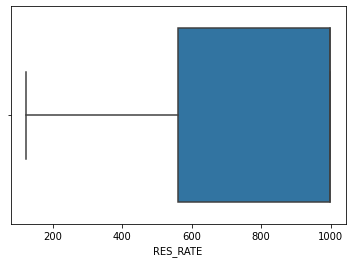

In [242]:
sns.boxplot(C2Vitals.loc[(C2Vitals['RES_RATE'] > 100)]['RES_RATE'])
# <60 >100

### BP_SYSTOLIC

In [243]:
C2Vitals.loc[(C2Vitals['BP_SYSTOLIC'] < 90)|(C2Vitals['BP_SYSTOLIC'] > 180), "BP_SYSTOLIC"] = 0.0

In [244]:
C2Vitals['BP_SYSTOLIC'].value_counts()

0.0      30647
124.0     2469
110.0     2404
122.0     2383
125.0     2317
         ...  
178.0       38
173.0       37
171.0       37
179.0       33
176.0       31
Name: BP_SYSTOLIC, Length: 92, dtype: int64

### BP_DIASTOLIC

In [245]:
C2Vitals.loc[(C2Vitals['BP_DIASTOLIC'] < 40)|(C2Vitals['BP_DIASTOLIC'] > 100), "BP_DIASTOLIC"] = 0.0

In [246]:
C2Vitals['BP_DIASTOLIC'].value_counts()

0.0     29605
70.0     3741
60.0     3494
74.0     3392
65.0     3345
        ...  
44.0      109
43.0       92
99.0       86
42.0       68
41.0       52
Name: BP_DIASTOLIC, Length: 62, dtype: int64

### Save New CSV

In [247]:
C2Vitals.to_csv('/content/drive/MyDrive/Data-science-project/clean2/vitals.csv')

##Lab

##Result Notes

In [248]:
ResultNote=C2Lab['Result Notes'].unique()

In [249]:
for note in ResultNote:
  print(note)

Streaming output truncated to the last 5000 lines.
1.669
150.41
183.28
2.850
3.869
164.39
106.73
35.42
89.00
169.48
191.69
154.11
24.23
88.53
56.48
201.75
155.34
117.83
35.41
33.00
63.08
44.70
89.17
146.82
152.14
1421
150.97
1377
57.75
1312
144.40
4.301
5.129
1.867
126.29
96.41
127.1
136.78
292.61
133.21
238.79
262.50
309.99
232.75
81.84
4.639
34.81
112.33
42.97
114.63
120.05
89.76
28.28
1641
1.219
1.654
103.91
90.64
122.70
87.06
65.68
185.87
114.75
163.05
0.051
197.66
621
95.83
70.54
41.61
8.973
12.281
267.60
172.30
250.01
136.84
61.55
24.31
164.80
260.19
233.92
126.83
89.59
42.94
145.68
67.07
289.45
43.45
146.58
842
130.84
212.6
386.4
94 (Ascitic Fluid)
732.4
467.9
304.8
38.45
252.27
155.61
122.66
86.21
220.71
775
98.54
4.709
7.204
221.5
110.94
73.54
1.717
173.41
47.75
3.370
390.2
199.7
76.25
279.93
258.61
29.85
108.27
126.59
35.80
161.88
87.35
37.29
197.94
101.63
121.99
111.59
2.414
140.54
186.10
38.68
34.56
3.928
228.38
221.33
544.8
1.348
323.6
193.15
217.51
257.90
178.80
167.53
99

In [250]:
for result_note in C2Lab['Result Notes'].unique():
  try:
    float(result_note)
  except ValueError:
      print(result_note)

----
-
--
---
`0.5
-*-
12.4`
>90
>5
over max :> 90
> 5.0
181.9 Need Conformation
> Max
10 (Ascitic Fluid)
>70
16 (in fluid)
32.5 fluid sample
>Max
-3.6--
0.59 (In Fluid)
Over max : > 90
OVER MAX : >5.0
over max >90
Over max
161 (from citrate)
>100
>5.0/conf dr.zain
>5.0
> 90
>5.00
>6
---8.8
conf
`
-----
.....
> max ( > 5 )
> max ( >5 )
1.4   in fluid
0.59   (In Fluid)
0.40 (fluid sample)
max<
200.7 (body fluid)
....
52(conf)
*
...
94 (Ascitic Fluid)
0.72 ( in fluid )
need conf
>50
>4.00
Over max : > 5
Over max : >90 sec
35 FROM CITRATE
-*
> Max ( > 90 )
4.06 (in pleural fluid)
18.4 (in pleural fluid)
Over Max : > 5.0
Over max : >90 s
24.1     Drain
0.75     Drain
2.4    (Pleural Fluid)
..
>90.0
> 100
.


In [251]:
result_counter=0
for result_note in C2Lab['Result Notes']:
  try:
    float(result_note)
  except ValueError:
      result_counter=result_counter+1
      # print(result_note)
print(result_counter)

8289


In [252]:
# C2Lab["Result Notes"].replace({"----": 0, '---':0,'--':0,'-':0, '`0.5':0.5, '-*-':0, '12.4`':12.4,'>90':90}, inplace=True)


##Normal Range

In [253]:
C2Lab['Normal Range'].unique()

array(['6-20', '4-11', '1-4.8', '1.8-7.70', '0.0-0.08', '20-50', '0.0-14',
       nan, '4.70-6.30', '14.0-18.0', '42.0-52.0', '26.0-32.0',
       '76.0-97.0', '11.0-16.0', '31.0-37.0', '140-440', '37.0-54.0',
       '8-11', '0.1-99.9', '0.00-0.50', '0.0-0.2', '0.0-0.40', '0.0-0.10',
       '8-23', '11-15', '1.1-1.2', '4.20-6.30', '12.0-14.0', '37.0-51.0',
       '80.0-97.0', '31.0-36.0', '10-41', '0-40', '0 -0.2', '10-33',
       '0-32', '0-0.2', '6-42', '10-71', '6-18', '30-75', '2.3-68',
       '3.90-5.50', '9.5-15.0', '29.0-54', '74-99', '24.0-34.0',
       '31.0-35.0', '140-570', '0.0-6.0', '0.0-1.0', '4-19', '6-20\n8-23'],
      dtype=object)

In [254]:
C2Lab['Normal Range'] = C2Lab['Normal Range'].replace(np.nan, 0)

In [255]:
C2Lab['Normal Range'].value_counts()

0             103508
37.0-54.0      34234
1-4.8          34234
1.8-7.70       34234
0.0-0.08       34234
0.0-14         34234
11.0-16.0      34234
8-11           34234
0.0-0.2        34233
0.00-0.50      34233
0.1-99.9       34231
26.0-32.0      34218
20-50          34218
4-11           34218
140-440        34218
0.0-0.40       34217
0.0-0.10       34217
76.0-97.0      20976
42.0-52.0      20976
14.0-18.0      20976
4.70-6.30      20976
31.0-37.0      20976
12.0-14.0      13242
4.20-6.30      13242
31.0-36.0      13242
80.0-97.0      13242
37.0-51.0      13242
11-15          10435
1.1-1.2        10435
6-20            9513
8-23            8600
0-40            7504
10-41           7498
10-33           4674
0-32            4672
0 -0.2          3760
0-0.2           2583
10-71             84
6-42              55
74-99             16
0.0-1.0           16
0.0-6.0           16
140-570           16
31.0-35.0         16
24.0-34.0         16
2.3-68            16
29.0-54           16
9.5-15.0     

based on the result of the normal range coloumn we decide to fill the normal ranges based on standereds

##Unit

In [256]:
C2Lab['Unit'].value_counts()

%           239643
10^3/µl     136940
fl          136937
g/dl         79880
10^3/ μl     68468
mg/dL        59173
10^6/ μl     34235
pg           34235
U/L          29382
mg/L         18253
seconds      10436
Name: Unit, dtype: int64

In [257]:
C2Lab['Unit'] = C2Lab['Unit'].replace(np.nan, 0)

In [258]:
C2Lab['Unit'].isnull().sum()

0

need further investegation to find out the standards units

## Save New CSV

In [259]:
C2Lab.to_csv('/content/drive/MyDrive/Data-science-project/clean2/lab.csv')

##Medication 

### Product Name

In [260]:
C2Med['Product Name'].value_counts()

PERFALGAN 10 MG/ML               31206
EMESTOP 10MG\1 ML  AMP           12934
NEXIUM I.V 40MG 10*5 ML          12922
AEROVENT SOLUTION                11389
DEXAMETHASONE ROMPHARM 4MG/ML    10704
                                 ...  
DICLECTIN 100 TAB                    1
VANCO-AVENIR 500 MG VIAL             1
FLUTISONE NAZAL SPRAY 16GM           1
OXYCOD 2MG/ML                        1
Imatinib 400MG 30 tab                1
Name: Product Name, Length: 1028, dtype: int64

### Mapping

In [261]:
drug = pd.read_excel('/content/drive/MyDrive/Data-science-project/mappingData/Drug codes.xlsx')

In [262]:
drug = drug.astype({"Product Code":"int"})
del drug['Standard Code']
del drug['Usage Name']
del drug['STOCK_BASE_UOM_DESC']

In [263]:
C2Med['Product Name']=C2Med['Product Name'].str.lower()
C2Med['Product Name']=C2Med['Product Name'].str.strip()

In [264]:
drug['Product Name']=drug['Product Name'].str.lower()
drug['Product Name']=drug['Product Name'].str.strip()

In [265]:
C2MedMapping=C2Med.merge(drug, on='Product Name', how='left')

In [266]:
C2MedMapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938041 entries, 0 to 938040
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EncounterID   938041 non-null  int64  
 1   Patient ID    938041 non-null  int64  
 2   Product Name  938041 non-null  object 
 3   Instructions  924098 non-null  object 
 4   APPLIED_DATE  938041 non-null  object 
 5   APPLIED_TIME  938041 non-null  object 
 6   ORDER_DATE    938041 non-null  object 
 7   ORDER_TIME    938041 non-null  object 
 8   Product Code  936132 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 71.6+ MB


In [267]:
del C2MedMapping['Product Name']

### Instructions

In [268]:
C2Med['Instructions'].value_counts()

Give 1 TABLET 1 Times Daily For   (Duration NA)   \n(Give TABLET 1 x 1 )                                                                                               20427
Give 1 VIAL 3 Times Daily For   (Duration NA)   \n(Give VIAL 1 x 3 )                                                                                                   19111
Give 1 VIAL 2 Times Daily For   (Duration NA)   \n(Give VIAL 1 x 2 )                                                                                                    9844
Give 1 VIAL 4 Times Daily For   (Duration NA)   \n(Give VIAL 1 x 4 )                                                                                                    9761
Give 1 TABLET 2 Times Daily For   (Duration NA)   \n(Give TABLET 1 x 2 )                                                                                                8819
                                                                                                                                       

In [269]:
Instructions=C2Med['Instructions'].unique()

In [270]:
len(Instructions)

9934

In [271]:
for ins in Instructions:
  print(ins)

Streaming output truncated to the last 5000 lines.
please give 30 mmol kalihos
Give 2 g Mg
give 30 mmol kaliphos
give 40 mEq KCL
Give 1 AMPOULE IM, IV 2 Times Daily For  2 Days  
(Give AMPOULE 1 x 2 x 2 Days)
Give 1 AMPOULE IM, IV, SC 2 Times Daily For  2 Days  
(Give AMPOULE 1 x 2 x 2 Days)
Give 50mg*1 iV stat
Give 1 VIAL IM, IV 2 Times Daily For  30 Days  
(Give VIAL 1 x 2 x 30 Days)

1 million nebilser *2
give 3 g Ca Gluconate
Give 6 IU IV, SC 3 Times Daily For  1 Months  
(Give IU 6 x 3 x 1 Months)
3 GM STAT
Give 1 AMPOULE IM, INFUSION 1 Time Daily For 1 Days 
(Give AMPOULE 1 x 1 x 1 Days)
Give 1 AMPOULE IM, IV 3 Times Daily For  18 Days  
(Give AMPOULE 1 x 3 x 18 Days)
GIVE 1/2 TAB *2
Give 10 AMPOULE IV 1 Time Daily For 1 Days 
AT RATE OF 50MCG/ HOUR
Give 1 TABLET Other 2 Times Daily For  1 Months  
(Give TABLET 1 x 2 x 1 Months) 
please give 100 mg x 2 po
Give 2 VIAL ORAL 3 Times Daily For  1 Months  
(Give VIAL 2 x 3 x 1 Months)
Give 1 MG IM,IV INFUSION 2 Times Daily For  1 Week

### Save New CSV

In [272]:
C2MedMapping.to_csv('/content/drive/MyDrive/Data-science-project/clean2/medication.csv')